<a href="https://colab.research.google.com/github/Shayantan1012/PV-Forcast-Project/blob/main/Updated_PV_Forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

dataset=pd.read_csv('/content/drive/MyDrive/XAI /Other data/PVGen-1.csv')
dataset=pd.DataFrame(dataset)
print(dataset.head())

               Time  Energy delta[Wh]  GHI  temp  pressure  humidity  \
0  01-01-2017 00:00                 0  0.0   1.6      1021       100   
1  01-01-2017 00:15                 0  0.0   1.6      1021       100   
2  01-01-2017 00:30                 0  0.0   1.6      1021       100   
3  01-01-2017 00:45                 0  0.0   1.6      1021       100   
4  01-01-2017 01:00                 0  0.0   1.7      1020       100   

   wind_speed  rain_1h  snow_1h  clouds_all  isSun  sunlightTime  dayLength  \
0         4.9      0.0      0.0         100      0             0        450   
1         4.9      0.0      0.0         100      0             0        450   
2         4.9      0.0      0.0         100      0             0        450   
3         4.9      0.0      0.0         100      0             0        450   
4         5.2      0.0      0.0         100      0             0        450   

   SunlightTime/daylength  weather_type  hour  month  
0                     0.0            

In [3]:
print(dataset.isna().sum())
print(dataset.columns)
print(len(dataset.columns))

Time                      0
Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
hour                      0
month                     0
dtype: int64
Index(['Time', 'Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity',
       'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'isSun',
       'sunlightTime', 'dayLength', 'SunlightTime/daylength', 'weather_type',
       'hour', 'month'],
      dtype='object')
17


In [4]:
print(dataset.tail())

                    Time  Energy delta[Wh]   GHI  temp  pressure  humidity  \
196771  31-08-2022 16:45               118  23.7  18.6      1023        57   
196772  31-08-2022 17:00                82  15.6  18.5      1023        61   
196773  31-08-2022 17:15                51   8.0  18.5      1023        61   
196774  31-08-2022 17:30                24   2.1  18.5      1023        61   
196775  31-08-2022 17:45                 0   0.0  18.5      1023        61   

        wind_speed  rain_1h  snow_1h  clouds_all  isSun  sunlightTime  \
196771         3.8      0.0      0.0          52      1           780   
196772         4.2      0.0      0.0          60      1           795   
196773         4.2      0.0      0.0          60      1           810   
196774         4.2      0.0      0.0          60      1           825   
196775         4.2      0.0      0.0          60      0             0   

        dayLength  SunlightTime/daylength  weather_type  hour  month  
196771        825    

In [5]:
print(dataset.columns)
dataset['Time']

Index(['Time', 'Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity',
       'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'isSun',
       'sunlightTime', 'dayLength', 'SunlightTime/daylength', 'weather_type',
       'hour', 'month'],
      dtype='object')


0         01-01-2017 00:00
1         01-01-2017 00:15
2         01-01-2017 00:30
3         01-01-2017 00:45
4         01-01-2017 01:00
                ...       
196771    31-08-2022 16:45
196772    31-08-2022 17:00
196773    31-08-2022 17:15
196774    31-08-2022 17:30
196775    31-08-2022 17:45
Name: Time, Length: 196776, dtype: object

<ipython-input-6-f7cebfe2ad8e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Energy delta[MWh]']=filtered_data['Energy delta[Wh]']*1e-6


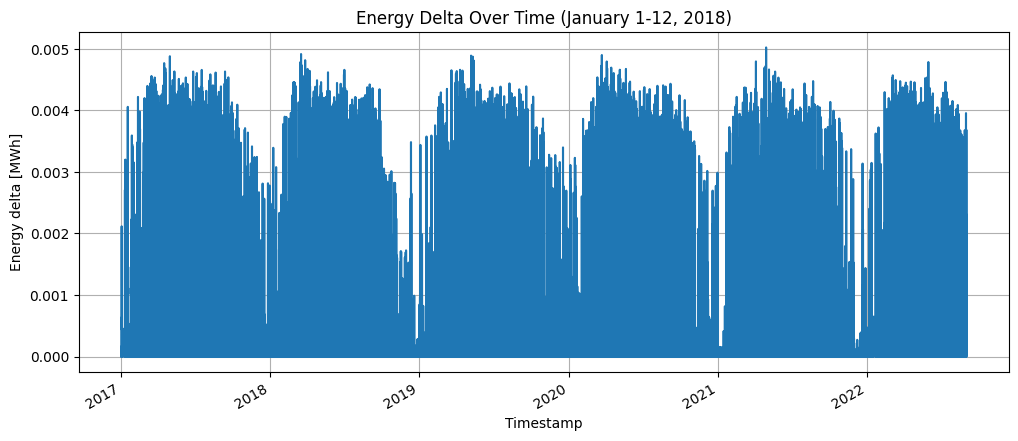

In [6]:
import matplotlib.pyplot as plt
start_time='2017-01-01'
end_time='2022-12-31'
dataset['Time'] = pd.to_datetime(dataset['Time'], format='%d-%m-%Y %H:%M')  # Adjust format to match your data
dataset.set_index('Time', inplace=True)
dataset = dataset[((dataset.index >= start_time) & (dataset.index <= end_time))]
filtered_data = dataset[start_time:end_time]  # Use YYYY-MM-DD format for slicing
filtered_data['Energy delta[MWh]']=filtered_data['Energy delta[Wh]']*1e-6

filtered_data['Energy delta[MWh]'].plot(figsize=(12, 5), title="Energy Delta Over Time (January 1-12, 2018)")
plt.xlabel("Timestamp")
plt.ylabel("Energy delta [MWh]")
plt.grid(True)
plt.show()



In [7]:
dataset.columns

Index(['Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity', 'wind_speed',
       'rain_1h', 'snow_1h', 'clouds_all', 'isSun', 'sunlightTime',
       'dayLength', 'SunlightTime/daylength', 'weather_type', 'hour', 'month'],
      dtype='object')

In [8]:
Y=filtered_data['Energy delta[MWh]']
X=filtered_data.drop(columns=['Energy delta[MWh]','Energy delta[Wh]'],axis=1)


print("X Head->",X.head)
print("X Tail->",X.tail)


X Head-> <bound method NDFrame.head of                       GHI  temp  pressure  humidity  wind_speed  rain_1h  \
Time                                                                       
2017-01-01 00:00:00   0.0   1.6      1021       100         4.9      0.0   
2017-01-01 00:15:00   0.0   1.6      1021       100         4.9      0.0   
2017-01-01 00:30:00   0.0   1.6      1021       100         4.9      0.0   
2017-01-01 00:45:00   0.0   1.6      1021       100         4.9      0.0   
2017-01-01 01:00:00   0.0   1.7      1020       100         5.2      0.0   
...                   ...   ...       ...       ...         ...      ...   
2022-08-31 16:45:00  23.7  18.6      1023        57         3.8      0.0   
2022-08-31 17:00:00  15.6  18.5      1023        61         4.2      0.0   
2022-08-31 17:15:00   8.0  18.5      1023        61         4.2      0.0   
2022-08-31 17:30:00   2.1  18.5      1023        61         4.2      0.0   
2022-08-31 17:45:00   0.0  18.5      1023        

In [9]:
print(dataset.index)
print(type(dataset.index))

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:15:00',
               '2017-01-01 00:30:00', '2017-01-01 00:45:00',
               '2017-01-01 01:00:00', '2017-01-01 01:15:00',
               '2017-01-01 01:30:00', '2017-01-01 01:45:00',
               '2017-01-01 02:00:00', '2017-01-01 02:15:00',
               ...
               '2022-08-31 15:30:00', '2022-08-31 15:45:00',
               '2022-08-31 16:00:00', '2022-08-31 16:15:00',
               '2022-08-31 16:30:00', '2022-08-31 16:45:00',
               '2022-08-31 17:00:00', '2022-08-31 17:15:00',
               '2022-08-31 17:30:00', '2022-08-31 17:45:00'],
              dtype='datetime64[ns]', name='Time', length=196776, freq=None)
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [10]:
CorrelationMatrix=X.corr()
CorrelationMatrix

GHI      temp  pressure  humidity  wind_speed  \
GHI                     1.000000  0.492732  0.096392 -0.602186    0.017227   
temp                    0.492732  1.000000 -0.066909 -0.517358   -0.080258   
pressure                0.096392 -0.066909  1.000000 -0.120481   -0.313964   
humidity               -0.602186 -0.517358 -0.120481  1.000000   -0.112949   
wind_speed              0.017227 -0.080258 -0.313964 -0.112949    1.000000   
rain_1h                -0.048570  0.073826 -0.201842  0.126620    0.123506   
snow_1h                -0.051811 -0.123244 -0.135485  0.095623    0.072749   
clouds_all             -0.188765 -0.117245 -0.263852  0.285336    0.146116   
isSun                   0.600326  0.345600  0.014872 -0.389144    0.082700   
sunlightTime            0.540151  0.504449  0.006731 -0.598166    0.054580   
dayLength               0.401115  0.706510  0.053127 -0.416460   -0.210064   
SunlightTime/daylength  0.471907  0.382672  0.001791 -0.527887    0.092661   
weather_type           -0.163616 -0.088711 -0.319925  0.286863    0.193744   
hour                   -0.083727  0.104091 -0.002519 -0.194924   -0.003593   
month                  -0.039461  0.250656 -0.061383  0.117468   -0.045010   

                         rain_1h   snow_1h  clouds_all     isSun  \
GHI                    -0.048570 -0.051811   -0.188765  0.600326   
temp                    0.073826 -0.123244   -0.117245  0.345600   
pressure               -0.201842 -0.135485   -0.263852  0.014872   
humidity                0.126620  0.095623    0.285336 -0.389144   
wind_speed              0.123506  0.072749    0.146116  0.082700   
rain_1h                 1.000000 -0.024276    0.173332  0.045241   
snow_1h                -0.024276  1.000000    0.088428 -0.023257   
clouds_all              0.173332  0.088428    1.000000 -0.002928   
isSun                   0.045241 -0.023257   -0.002928  1.000000   
sunlightTime            0.059318 -0.038293   -0.030415  0.742715   
dayLength               0.048428 -0.109050   -0.234957  0.270923   
SunlightTime/daylength  0.050164 -0.021457    0.004761  0.774424   
weather_type            0.330671  0.143205    0.910932  0.024333   
hour                    0.011388 -0.004609   -0.019384 -0.150529   
month                   0.022221 -0.080668    0.066102 -0.024573   

                        sunlightTime  dayLength  SunlightTime/daylength  \
GHI                         0.540151   0.401115                0.471907   
temp                        0.504449   0.706510                0.382672   
pressure                    0.006731   0.053127                0.001791   
humidity                   -0.598166  -0.416460               -0.527887   
wind_speed                  0.054580  -0.210064                0.092661   
rain_1h                     0.059318   0.048428                0.050164   
snow_1h                    -0.038293  -0.109050               -0.021457   
clouds_all                 -0.030415  -0.234957                0.004761   
isSun                       0.742715   0.270923                0.774424   
sunlightTime                1.000000   0.368712                0.957972   
dayLength                   0.368712   1.000000                0.205698   
SunlightTime/daylength      0.957972   0.205698                1.000000   
weather_type                0.006140  -0.194644                0.034283   
hour                        0.144919  -0.000062                0.136889   
month                      -0.028355  -0.090981               -0.018653   

                        weather_type      hour     month  
GHI                        -0.163616 -0.083727 -0.039461  
temp                       -0.088711  0.104091  0.250656  
pressure                   -0.319925 -0.002519 -0.061383  
humidity                    0.286863 -0.194924  0.117468  
wind_speed                  0.193744 -0.003593 -0.045010  
rain_1h                     0.330671  0.011388  0.022221  
snow_1h                     0.143205 -0.004609 -0.080668  
clouds_all        

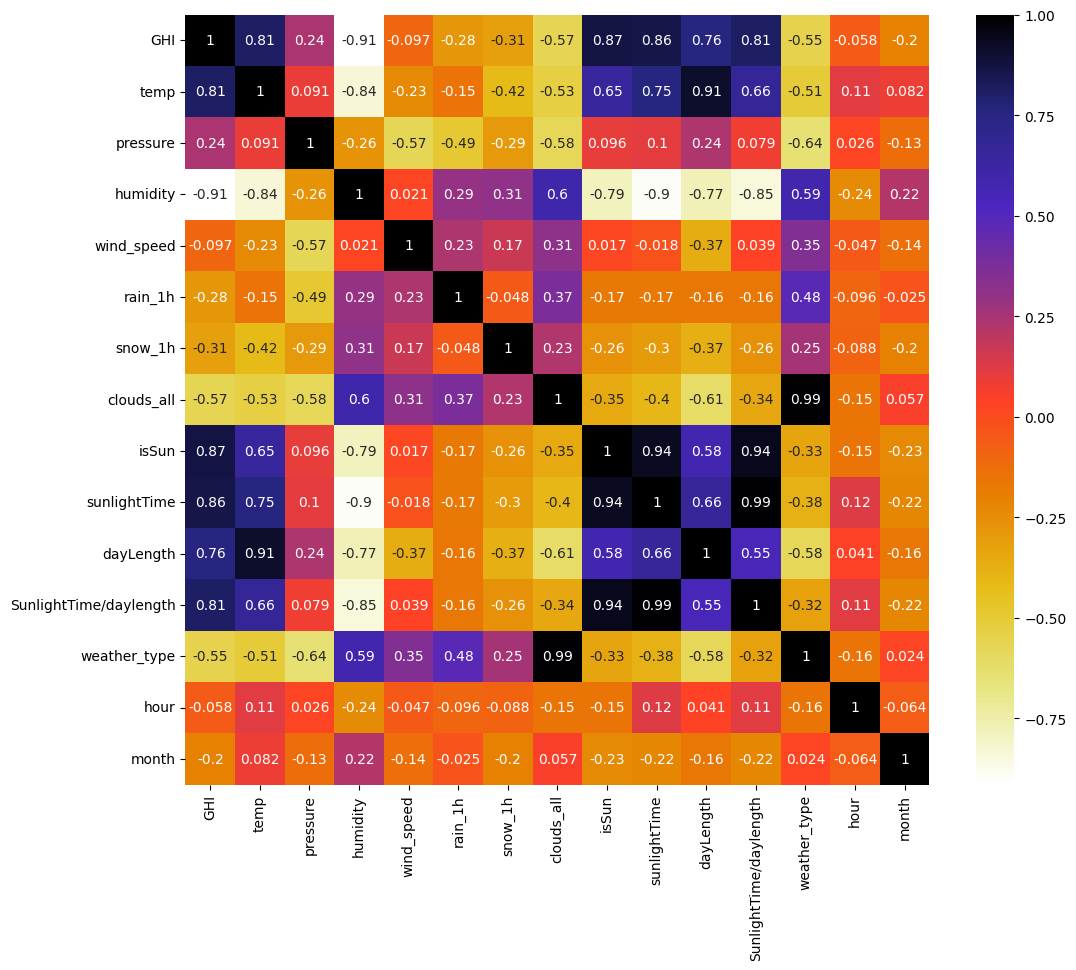

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = CorrelationMatrix.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [12]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [13]:
correlation=correlation(X,0.9)
print(correlation)
X=X.drop(correlation,axis=1)
X

{'weather_type', 'SunlightTime/daylength'}


GHI  temp  pressure  humidity  wind_speed  rain_1h  \
Time                                                                       
2017-01-01 00:00:00   0.0   1.6      1021       100         4.9      0.0   
2017-01-01 00:15:00   0.0   1.6      1021       100         4.9      0.0   
2017-01-01 00:30:00   0.0   1.6      1021       100         4.9      0.0   
2017-01-01 00:45:00   0.0   1.6      1021       100         4.9      0.0   
2017-01-01 01:00:00   0.0   1.7      1020       100         5.2      0.0   
...                   ...   ...       ...       ...         ...      ...   
2022-08-31 16:45:00  23.7  18.6      1023        57         3.8      0.0   
2022-08-31 17:00:00  15.6  18.5      1023        61         4.2      0.0   
2022-08-31 17:15:00   8.0  18.5      1023        61         4.2      0.0   
2022-08-31 17:30:00   2.1  18.5      1023        61         4.2      0.0   
2022-08-31 17:45:00   0.0  18.5      1023        61         4.2      0.0   

                     snow_1h  clouds_all  isSun  sunlightTime  dayLength  \
Time                                                                       
2017-01-01 00:00:00      0.0         100      0             0        450   
2017-01-01 00:15:00      0.0         100      0             0        450   
2017-01-01 00:30:00      0.0         100      0             0        450   
2017-01-01 00:45:00      0.0         100      0             0        450   
2017-01-01 01:00:00      0.0         100      0             0        450   
...                      ...         ...    ...           ...        ...   
2022-08-31 16:45:00      0.0          52      1           780        825   
2022-08-31 17:00:00      0.0          60      1           795        825   
2022-08-31 17:15:00      0.0          60      1           810        825   
2022-08-31 17:30:00      0.0          60      1           825        825   
2022-08-31 17:45:00      0.0          60      0             0        825   

                     hour  month  
Time                              
2017-01-01 00:00:00     0      1  
2017-01-01 00:15:00     0      1  
2017-01-01 00:30:00     0      1  
2017-01-01 00:45:00     0      1  
2017-01-01 01:00:00     1      1  
...                   ...    ...  
2022-08-31 16:45:00    16      8  
2022-08-31 17:00:00    17      8  
2022-08-31 17:15:00    17      8  
2022-08-31 17:30:00    17      8  
2022-08-31 17:45:00    17      8  

[196776 rows x 13 columns]

In [14]:
!pip install mlxtend
!pip install --upgrade scikit-learn mlxtend


In [15]:
import sklearn
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [16]:
bakward_feature_selector = SequentialFeatureSelector(LinearRegression(n_jobs=1),
                                                    k_features=8,
                                                    forward=False,
                                                    floating=False,
                                                    verbose=2,
                                                    scoring= "r2",
                                                    cv= 5).fit(X,Y)


[2025-03-30 13:03:28] Features: 12/8 -- score: 0.8478691095841286
[2025-03-30 13:03:41] Features: 11/8 -- score: 0.8478407488741244
[2025-03-30 13:03:49] Features: 10/8 -- score: 0.847797289371746
[2025-03-30 13:03:53] Features: 9/8 -- score: 0.8477052092831985
[2025-03-30 13:03:56] Features: 8/8 -- score: 0.8475987806046874

In [17]:
columns=bakward_feature_selector.k_feature_names_
columns


('GHI',
 'temp',
 'pressure',
 'humidity',
 'clouds_all',
 'isSun',
 'sunlightTime',
 'dayLength')

In [18]:
bakward_feature_selector.k_score_

np.float64(0.8475987806046874)

In [19]:
X = X[[col for col in X.columns if col in columns]]
X.head()

GHI  temp  pressure  humidity  clouds_all  isSun  \
Time                                                                    
2017-01-01 00:00:00  0.0   1.6      1021       100         100      0   
2017-01-01 00:15:00  0.0   1.6      1021       100         100      0   
2017-01-01 00:30:00  0.0   1.6      1021       100         100      0   
2017-01-01 00:45:00  0.0   1.6      1021       100         100      0   
2017-01-01 01:00:00  0.0   1.7      1020       100         100      0   

                     sunlightTime  dayLength  
Time                                          
2017-01-01 00:00:00             0        450  
2017-01-01 00:15:00             0        450  
2017-01-01 00:30:00             0        450  
2017-01-01 00:45:00             0        450  
2017-01-01 01:00:00             0        450

In [20]:
print(dataset.head())

                     Energy delta[Wh]  GHI  temp  pressure  humidity  \
Time                                                                   
2017-01-01 00:00:00                 0  0.0   1.6      1021       100   
2017-01-01 00:15:00                 0  0.0   1.6      1021       100   
2017-01-01 00:30:00                 0  0.0   1.6      1021       100   
2017-01-01 00:45:00                 0  0.0   1.6      1021       100   
2017-01-01 01:00:00                 0  0.0   1.7      1020       100   

                     wind_speed  rain_1h  snow_1h  clouds_all  isSun  \
Time                                                                   
2017-01-01 00:00:00         4.9      0.0      0.0         100      0   
2017-01-01 00:15:00         4.9      0.0      0.0         100      0   
2017-01-01 00:30:00         4.9      0.0      0.0         100      0   
2017-01-01 00:45:00         4.9      0.0      0.0         100      0   
2017-01-01 01:00:00         5.2      0.0      0.0         100  

In [21]:
!pip install statsmodels

# **GRU MODEL**

In [22]:
X_G=X
Y_G=Y
print(X.shape)
st_time='2018-01-01'
X_G

(196776, 8)


GHI  temp  pressure  humidity  clouds_all  isSun  \
Time                                                                     
2017-01-01 00:00:00   0.0   1.6      1021       100         100      0   
2017-01-01 00:15:00   0.0   1.6      1021       100         100      0   
2017-01-01 00:30:00   0.0   1.6      1021       100         100      0   
2017-01-01 00:45:00   0.0   1.6      1021       100         100      0   
2017-01-01 01:00:00   0.0   1.7      1020       100         100      0   
...                   ...   ...       ...       ...         ...    ...   
2022-08-31 16:45:00  23.7  18.6      1023        57          52      1   
2022-08-31 17:00:00  15.6  18.5      1023        61          60      1   
2022-08-31 17:15:00   8.0  18.5      1023        61          60      1   
2022-08-31 17:30:00   2.1  18.5      1023        61          60      1   
2022-08-31 17:45:00   0.0  18.5      1023        61          60      0   

                     sunlightTime  dayLength  
Time                                          
2017-01-01 00:00:00             0        450  
2017-01-01 00:15:00             0        450  
2017-01-01 00:30:00             0        450  
2017-01-01 00:45:00             0        450  
2017-01-01 01:00:00             0        450  
...                           ...        ...  
2022-08-31 16:45:00           780        825  
2022-08-31 17:00:00           795        825  
2022-08-31 17:15:00           810        825  
2022-08-31 17:30:00           825        825  
2022-08-31 17:45:00             0        825  

[196776 rows x 8 columns]

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
X_G

GHI  temp  pressure  humidity  clouds_all  isSun  \
Time                                                                     
2017-01-01 00:00:00   0.0   1.6      1021       100         100      0   
2017-01-01 00:15:00   0.0   1.6      1021       100         100      0   
2017-01-01 00:30:00   0.0   1.6      1021       100         100      0   
2017-01-01 00:45:00   0.0   1.6      1021       100         100      0   
2017-01-01 01:00:00   0.0   1.7      1020       100         100      0   
...                   ...   ...       ...       ...         ...    ...   
2022-08-31 16:45:00  23.7  18.6      1023        57          52      1   
2022-08-31 17:00:00  15.6  18.5      1023        61          60      1   
2022-08-31 17:15:00   8.0  18.5      1023        61          60      1   
2022-08-31 17:30:00   2.1  18.5      1023        61          60      1   
2022-08-31 17:45:00   0.0  18.5      1023        61          60      0   

                     sunlightTime  dayLength  
Time                                          
2017-01-01 00:00:00             0        450  
2017-01-01 00:15:00             0        450  
2017-01-01 00:30:00             0        450  
2017-01-01 00:45:00             0        450  
2017-01-01 01:00:00             0        450  
...                           ...        ...  
2022-08-31 16:45:00           780        825  
2022-08-31 17:00:00           795        825  
2022-08-31 17:15:00           810        825  
2022-08-31 17:30:00           825        825  
2022-08-31 17:45:00             0        825  

[196776 rows x 8 columns]

In [25]:
#normalizing the data
scaler = MinMaxScaler()
# Convert Series to DataFrame
Y_G = Y_G.to_frame()
X_G=pd.concat([X_G,Y_G],axis=1)

scaled_values = scaler.fit_transform(X_G)
scaled_values.shape


(196776, 9)

In [26]:
X_G
features_col=X_G.columns
print(features_col)

Index(['GHI', 'temp', 'pressure', 'humidity', 'clouds_all', 'isSun',
       'sunlightTime', 'dayLength', 'Energy delta[MWh]'],
      dtype='object')


In [27]:
Y_G

Energy delta[MWh]
Time                                  
2017-01-01 00:00:00           0.000000
2017-01-01 00:15:00           0.000000
2017-01-01 00:30:00           0.000000
2017-01-01 00:45:00           0.000000
2017-01-01 01:00:00           0.000000
...                                ...
2022-08-31 16:45:00           0.000118
2022-08-31 17:00:00           0.000082
2022-08-31 17:15:00           0.000051
2022-08-31 17:30:00           0.000024
2022-08-31 17:45:00           0.000000

[196776 rows x 1 columns]

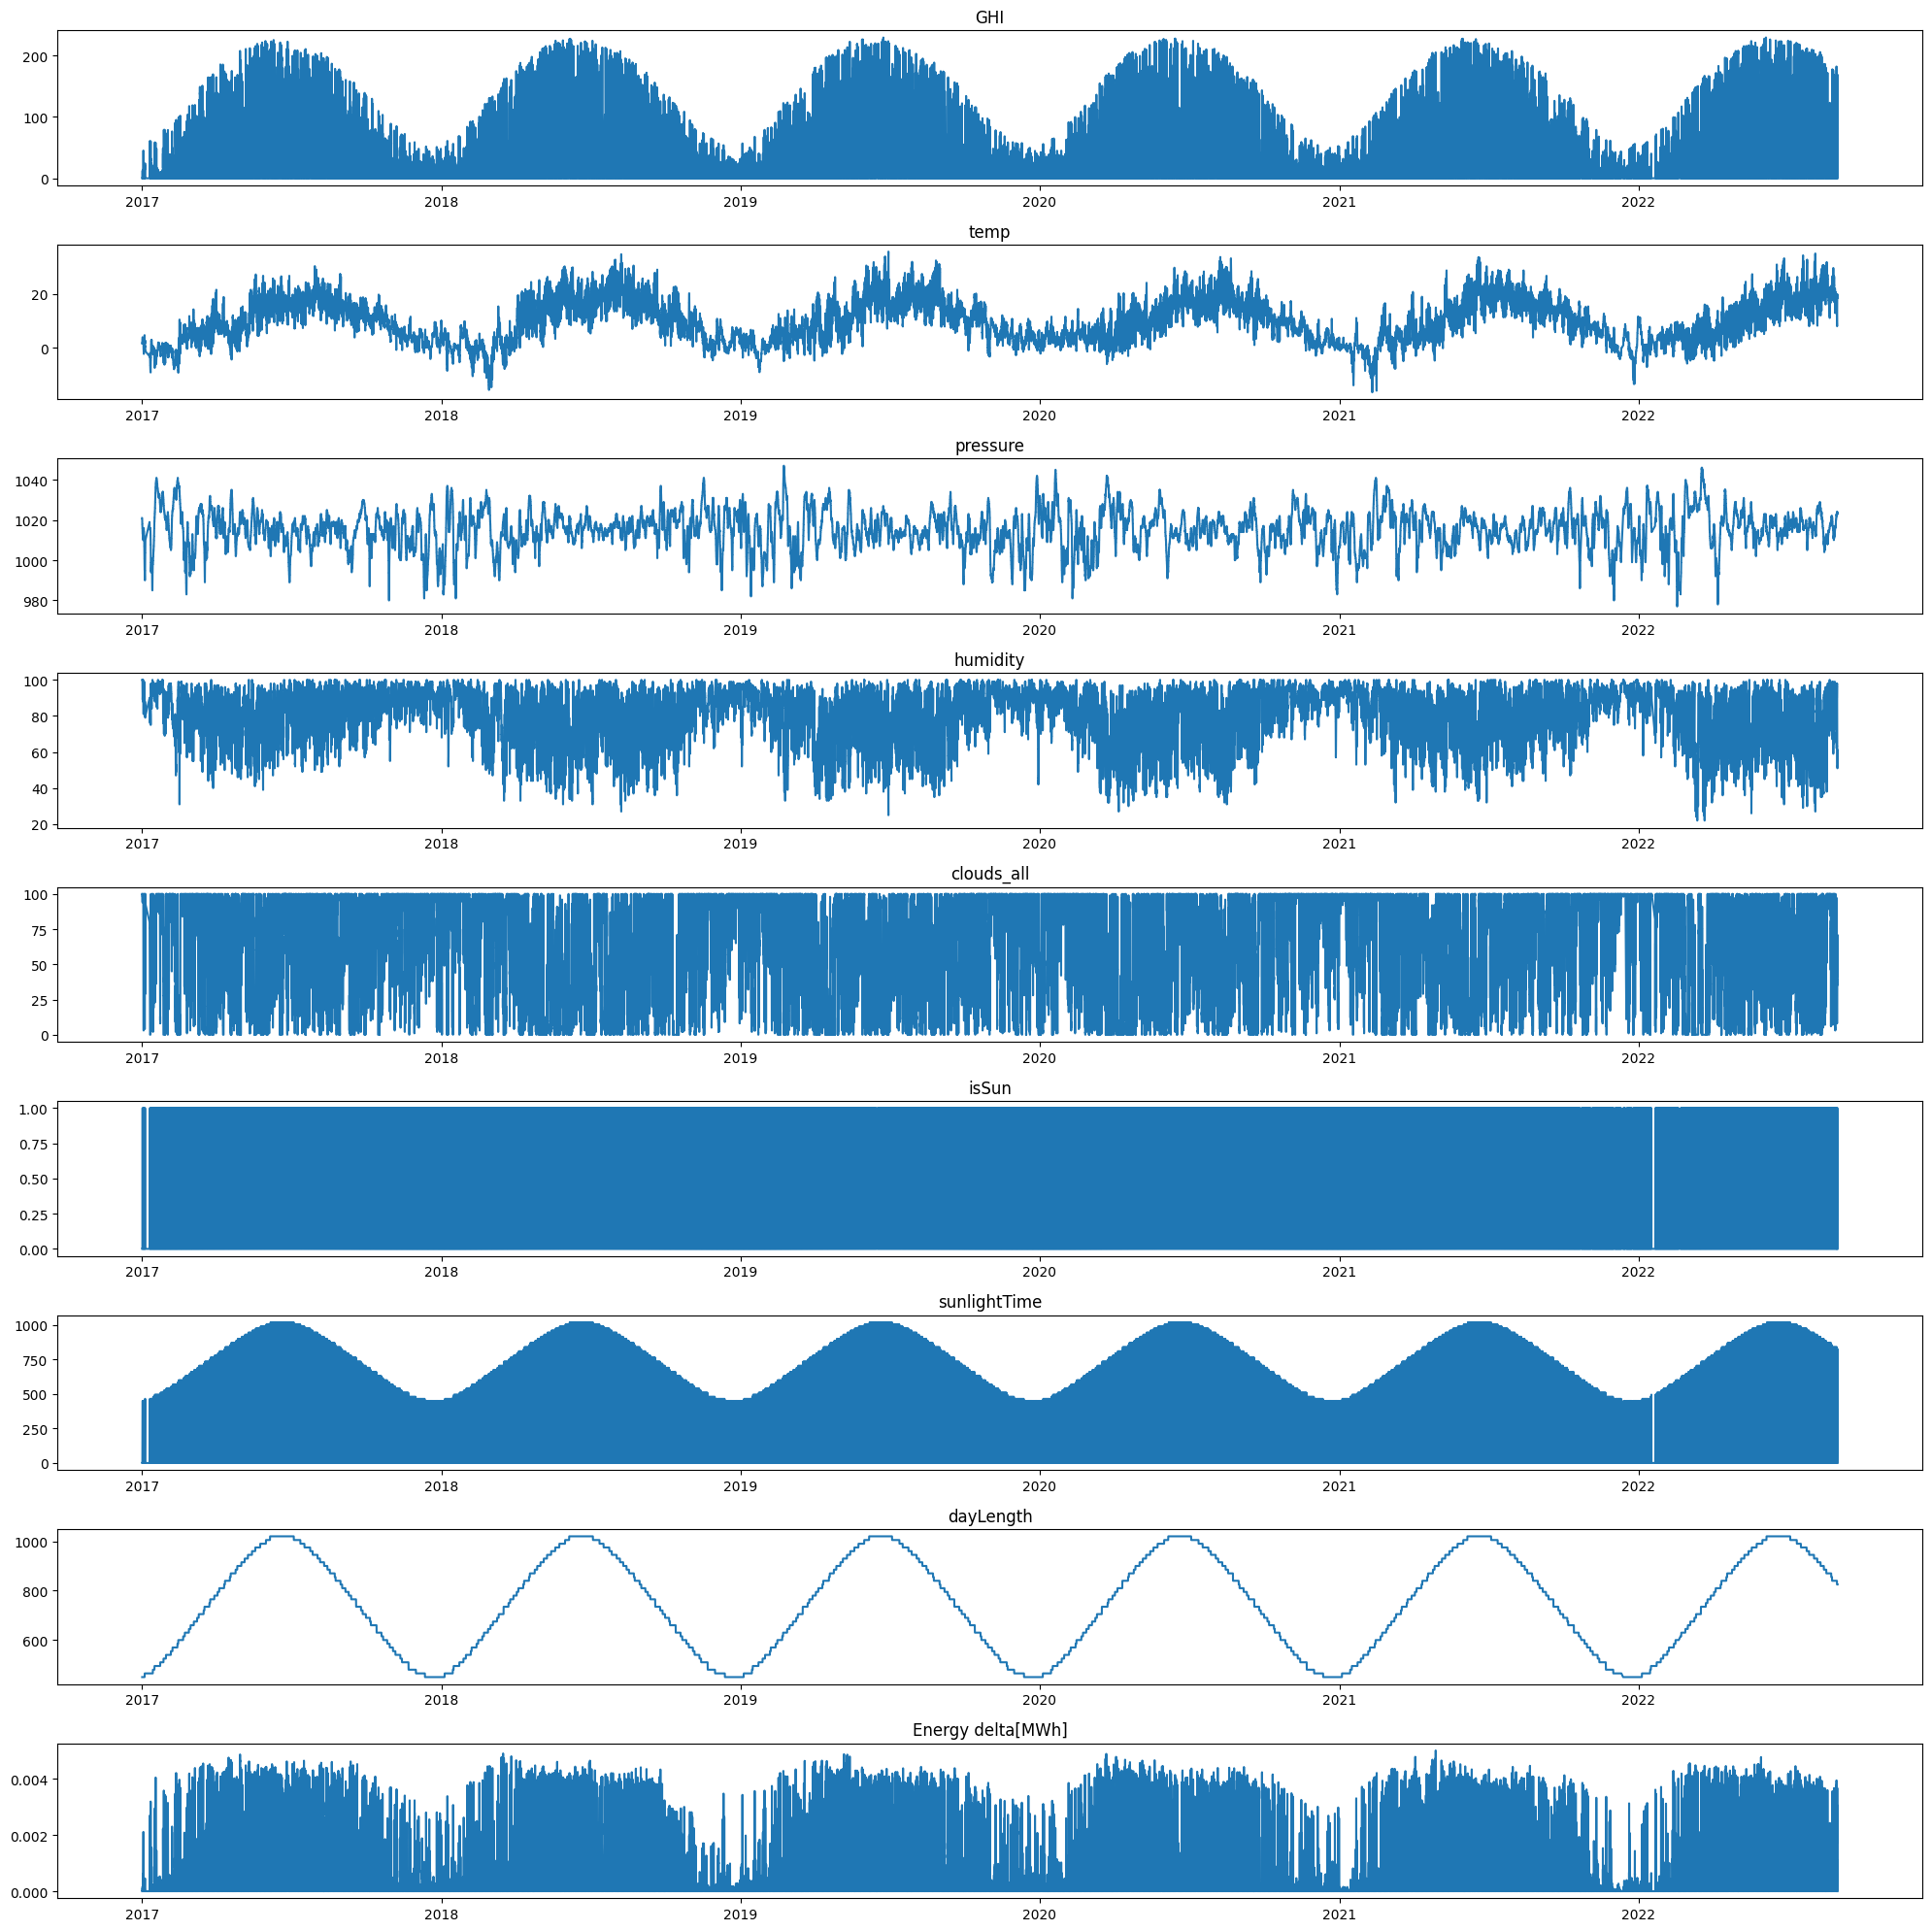

In [28]:
figure, axes = plt.subplots(len(X_G.columns),1,figsize=(20, 20))
start_time = pd.to_datetime('2018-01-01')
end_time = pd.to_datetime('2018-12-31')

for ax,col in zip(axes,X_G.columns):
    ax.plot(X_G[col])
    ax.set_title(col)
    ax.axes.xaxis.set_visible(True)


plt.tight_layout()
plt.show()


In [29]:
import numpy as np

def create_sequence(data, window_size):
    X = []
    y = []
    for i in range(window_size, len(data)):
        # Use numpy slicing instead of iloc
        X.append(data[i-window_size:i])  # Use array slicing
        y.append(data[i])  # Target value for this sequence
    return np.array(X), np.array(y)

X_G_scaled, Y_G_scaled = create_sequence(scaled_values, 60)

# Print the first sequence and corresponding target



In [30]:
X_G_scaled.shape

(196716, 60, 9)

In [31]:
X_G_scaled.shape[1], X_G_scaled.shape[2]

(60, 9)

In [32]:
Y_G_scaled.shape

(196716, 9)

In [33]:
from sklearn.model_selection import train_test_split

X_train_G, X_test_G, y_train_G, y_test_G = train_test_split(X_G_scaled, Y_G_scaled, test_size = 0.2, random_state=42,shuffle=False)
X_train_G.shape, y_train_G.shape, X_test_G.shape, y_test_G.shape

((157372, 60, 9), (157372, 9), (39344, 60, 9), (39344, 9))

In [34]:
Y_G_scaled

array([[0.        , 0.38549618, 0.51428571, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.38549618, 0.51428571, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.38549618, 0.51428571, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.03490401, 0.66984733, 0.65714286, ..., 0.79411765, 0.65789474,
        0.01015936],
       [0.0091623 , 0.66984733, 0.65714286, ..., 0.80882353, 0.65789474,
        0.00478088],
       [0.        , 0.66984733, 0.65714286, ..., 0.        , 0.65789474,
        0.        ]])

In [35]:
X_test_G.size

21245760

In [36]:

y_test_G=scaler.inverse_transform(y_test_G)


In [37]:
y_test_G

array([[0.000e+00, 1.780e+01, 1.010e+03, ..., 0.000e+00, 1.020e+03,
        0.000e+00],
       [0.000e+00, 1.780e+01, 1.010e+03, ..., 0.000e+00, 1.020e+03,
        0.000e+00],
       [0.000e+00, 1.780e+01, 1.010e+03, ..., 0.000e+00, 1.020e+03,
        0.000e+00],
       ...,
       [8.000e+00, 1.850e+01, 1.023e+03, ..., 8.100e+02, 8.250e+02,
        5.100e-05],
       [2.100e+00, 1.850e+01, 1.023e+03, ..., 8.250e+02, 8.250e+02,
        2.400e-05],
       [0.000e+00, 1.850e+01, 1.023e+03, ..., 0.000e+00, 8.250e+02,
        0.000e+00]])

In [38]:
X_test_G.shape

(39344, 60, 9)

In [39]:
X_train_G.shape

(157372, 60, 9)

In [40]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [41]:
class TabulerDataset(Dataset):
  def __init__(self ,X,y):
    self.X=torch.tensor(X,dtype=torch.float32)
    self.y=torch.tensor(y,dtype=torch.float32)
  def __len__(self):
    return len(self.X)
  def __getitem__(self,idx):
    return self.X[idx],self.y[idx]

In [42]:
loader=TabulerDataset(X_train_G,y_train_G)

dataloader=DataLoader(loader,batch_size=60,shuffle=False);

In [43]:
len(dataloader)

2623

In [44]:

iterator = iter(dataloader)
X_batch, y_batch = next(iterator)

print(X_batch.shape)
print(y_batch.shape)

torch.Size([60, 60, 9])
torch.Size([60, 9])


In [45]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [46]:
class GRUblock(nn.Module):
  def __init__(self,input_size,hidden_size,num_layers):
    super(GRUblock,self).__init__()
    self.hidden_size=hidden_size
    self.num_layers=num_layers
    self.input_size=input_size
    self.gru1=nn.GRU(input_size, hidden_size, num_layers=1)
    self.gru2=nn.GRU(hidden_size, hidden_size, num_layers=1)
    self.fc=nn.Linear(hidden_size,9)
  def forward(self,x):
    h0=torch.zeros(self.num_layers,x.size(0),self.hidden_size).to(device)


    h1=torch.zeros(self.num_layers,x.size(0),self.hidden_size).to(device)


    x=x.to(device)
    out,(h1)=self.gru1(x,(h0))
    out,(h1)=self.gru2(out,(h1))
    out=self.fc(out[: ,-1 , :])
    return out



In [47]:
X_train_G.shape

(157372, 60, 9)

In [48]:
gru=GRUblock(X_train_G.shape[2],64,1).to(device)
loss_fn=nn.MSELoss()
optimizer=torch.optim.Adam(gru.parameters(),lr=0.001)

In [49]:
def train_gru(model,dataloader,loss_fn,optimizer,device,epochs):
  for epochs in range(epochs):
    total_loss=0
    for i,(X_batch,y_batch) in enumerate(dataloader):
      if(i==len(dataloader)-1):
        break
      X_batch=X_batch.to(device)
      y_batch=y_batch.to(device)

      y_pred=model(X_batch)

      loss=loss_fn(y_pred,y_batch)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      total_loss+=loss
    avg_loss=total_loss/len(dataloader)
    print(f'The avg loss in EPOCH:{epochs} is {avg_loss}')



In [50]:
# train_gru(gru,dataloader,loss_fn,optimizer,device,30)

In [51]:
# torch.save(gru.state_dict(),'/content/drive/MyDrive/XAI /Other data/SAVEDMODEL PV/gru_model.pt')

In [52]:
model_gru=GRUblock(X_train_G.shape[2],64,1).to(device)
model_gru.load_state_dict(torch.load('/content/drive/MyDrive/XAI /Other data/SAVEDMODEL PV/gru_model.pt'))
model_gru.eval()

GRUblock(
  (gru1): GRU(9, 64)
  (gru2): GRU(64, 64)
  (fc): Linear(in_features=64, out_features=9, bias=True)
)

In [53]:
X_test_G.shape

(39344, 60, 9)

In [54]:
y_test_G.shape

(39344, 9)

In [55]:
test_loader=TabulerDataset(X_test_G,y_test_G)
test_loader=DataLoader(test_loader,batch_size=60,shuffle=False)


In [56]:
len(test_loader)

656

In [57]:
gru.eval()
cou=0
predicted=[]
with torch.no_grad():
    for i, (X_batch, y_batch) in enumerate(test_loader):
        if i == (len(test_loader) - 1):
          continue
        X_batch = X_batch.to(device)
        yPred = model_gru(X_batch)
        predicted.append(yPred.cpu().numpy())




In [58]:

predicted=np.array(predicted)

In [59]:
predicted.shape

(655, 60, 9)

In [60]:
predicted=predicted.reshape(-1,9)
predicted.shape

(39300, 9)

In [61]:
yPredDF = pd.DataFrame(predicted)
y_pred_inv_df_gru =yPredDF
y_pred_inv_df_gru.columns=X_G.columns




In [62]:
y_pred_inv_df_gru=scaler.inverse_transform(y_pred_inv_df_gru)

In [63]:
y_pred_inv_df_gru=pd.DataFrame(y_pred_inv_df_gru)
y_pred_inv_df_gru.columns=X_G.columns

In [64]:
y_pred_inv_df_gru.shape

(39300, 9)

In [65]:
y_test_G.shape

(39344, 9)

In [66]:
# Trim index so its length becomes exactly 39300
trimmed_index = X_G.index[-len(y_test_G):][:-44]

# Now assign this to prediction DataFrame
y_pred_inv_df_gru.index = trimmed_index

In [67]:
y_pred_inv_df_gru

GHI       temp     pressure   humidity  \
Time                                                                 
2021-07-04 22:00:00   -2.531039  17.433132  1008.740845  93.086700   
2021-07-04 22:15:00   -0.885710  18.069864  1010.775757  87.551750   
2021-07-04 22:30:00   -2.432981  18.707075  1010.636658  87.427368   
2021-07-04 22:45:00    1.883324  18.195126  1009.531189  87.403725   
2021-07-04 23:00:00   -1.099274  17.931314  1010.268311  88.644707   
...                         ...        ...          ...        ...   
2022-08-31 05:45:00   60.823421  11.292732  1025.808350  96.514046   
2022-08-31 06:00:00   70.318108  12.157183  1025.826294  94.238411   
2022-08-31 06:15:00   83.357193  17.028275  1026.141113  90.850136   
2022-08-31 06:30:00   91.270355  16.754530  1025.788940  91.157204   
2022-08-31 06:45:00  104.925606  16.955082  1025.828369  92.550613   

                     clouds_all     isSun  sunlightTime    dayLength  \
Time                                                                   
2021-07-04 22:00:00   22.756308 -0.052526    -51.429100  1024.696289   
2021-07-04 22:15:00   56.421059 -0.061752      4.740033  1023.320740   
2021-07-04 22:30:00   55.808483 -0.013558    -11.081832  1026.335449   
2021-07-04 22:45:00   56.110233 -0.005570     12.047102  1025.713623   
2021-07-04 23:00:00   59.968712  0.023701     -1.872053  1023.800537   
...                         ...       ...           ...          ...   
2022-08-31 05:45:00   24.273338  1.020967    159.293900   871.149536   
2022-08-31 06:00:00   25.473476  1.019101    176.786392   872.253235   
2022-08-31 06:15:00   21.302048  1.015464    188.043106   869.080505   
2022-08-31 06:30:00   21.127237  1.021504    202.199768   869.048340   
2022-08-31 06:45:00   22.249142  1.009490    218.749222   871.703979   

                     Energy delta[MWh]  
Time                                    
2021-07-04 22:00:00           0.000094  
2021-07-04 22:15:00          -0.000014  
2021-07-04 22:30:00          -0.000017  
2021-07-04 22:45:00           0.000102  
2021-07-04 23:00:00           0.000064  
...                                ...  
2022-08-31 05:45:00           0.000251  
2022-08-31 06:00:00           0.000267  
2022-08-31 06:15:00           0.000358  
2022-08-31 06:30:00           0.000596  
2022-08-31 06:45:00           0.000907  

[39300 rows x 9 columns]

In [68]:
y_test_G=pd.DataFrame(y_test_G)
y_test_G.columns=X_G.columns
y_test_G=y_test_G[:-44]
y_test_G.index=trimmed_index
y_test_G

GHI  temp  pressure  humidity  clouds_all  isSun  \
Time                                                                     
2021-07-04 22:00:00   0.0  17.8    1010.0      88.0        53.0    0.0   
2021-07-04 22:15:00   0.0  17.8    1010.0      88.0        53.0    0.0   
2021-07-04 22:30:00   0.0  17.8    1010.0      88.0        53.0    0.0   
2021-07-04 22:45:00   0.0  17.8    1010.0      88.0        53.0    0.0   
2021-07-04 23:00:00   0.0  17.3    1010.0      93.0        42.0    0.0   
...                   ...   ...       ...       ...         ...    ...   
2022-08-31 05:45:00  54.9   8.1    1024.0      96.0        19.0    1.0   
2022-08-31 06:00:00  64.9  14.6    1024.0      90.0        15.0    1.0   
2022-08-31 06:15:00  74.8  14.6    1024.0      90.0        15.0    1.0   
2022-08-31 06:30:00  84.5  14.6    1024.0      90.0        15.0    1.0   
2022-08-31 06:45:00  94.1  14.6    1024.0      90.0        15.0    1.0   

                     sunlightTime  dayLength  Energy delta[MWh]  
Time                                                             
2021-07-04 22:00:00           0.0     1020.0           0.000000  
2021-07-04 22:15:00           0.0     1020.0           0.000000  
2021-07-04 22:30:00           0.0     1020.0           0.000000  
2021-07-04 22:45:00           0.0     1020.0           0.000000  
2021-07-04 23:00:00           0.0     1020.0           0.000000  
...                           ...        ...                ...  
2022-08-31 05:45:00         120.0      825.0           0.000162  
2022-08-31 06:00:00         135.0      825.0           0.000181  
2022-08-31 06:15:00         150.0      825.0           0.000377  
2022-08-31 06:30:00         165.0      825.0           0.000634  
2022-08-31 06:45:00         180.0      825.0           0.001040  

[39300 rows x 9 columns]

In [69]:
def mean_squared_error(y_true,y_pred):
  return np.mean((y_true-y_pred)**2)

def mean_absolute_error(y_true,y_pred):
  return np.mean(np.abs(y_true-y_pred))

def root_mean_squared_error(y_true,y_pred):
  return np.sqrt(mean_squared_error(y_true,y_pred))


MSE:7.741666560855318e-08
MAE:0.00014905739159080163
RMSE:0.0002782385048992198


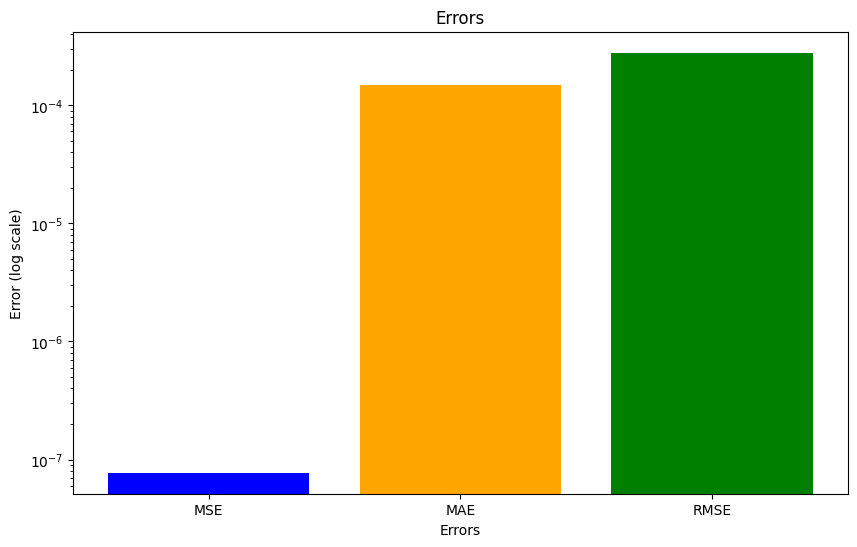

In [70]:
mse_g=mean_squared_error(y_test_G['Energy delta[MWh]'],y_pred_inv_df_gru['Energy delta[MWh]']);
mae_g=mean_absolute_error(y_test_G['Energy delta[MWh]'],y_pred_inv_df_gru['Energy delta[MWh]']);
rmse_g=root_mean_squared_error(y_test_G['Energy delta[MWh]'],y_pred_inv_df_gru['Energy delta[MWh]']);
print(f'MSE:{mse_g}\nMAE:{mae_g}\nRMSE:{rmse_g}')
plt.figure(figsize=(10, 6))
errors={'MSE' : mse_g , 'MAE' : mae_g ,'RMSE' : rmse_g }
plt.bar(errors.keys(),errors.values() , color=['blue', 'orange', 'green']);
plt.xlabel('Errors')
plt.yscale('log')  # Apply log scale to y-axis
plt.ylabel('Error (log scale)')
plt.title('Errors')
plt.show()


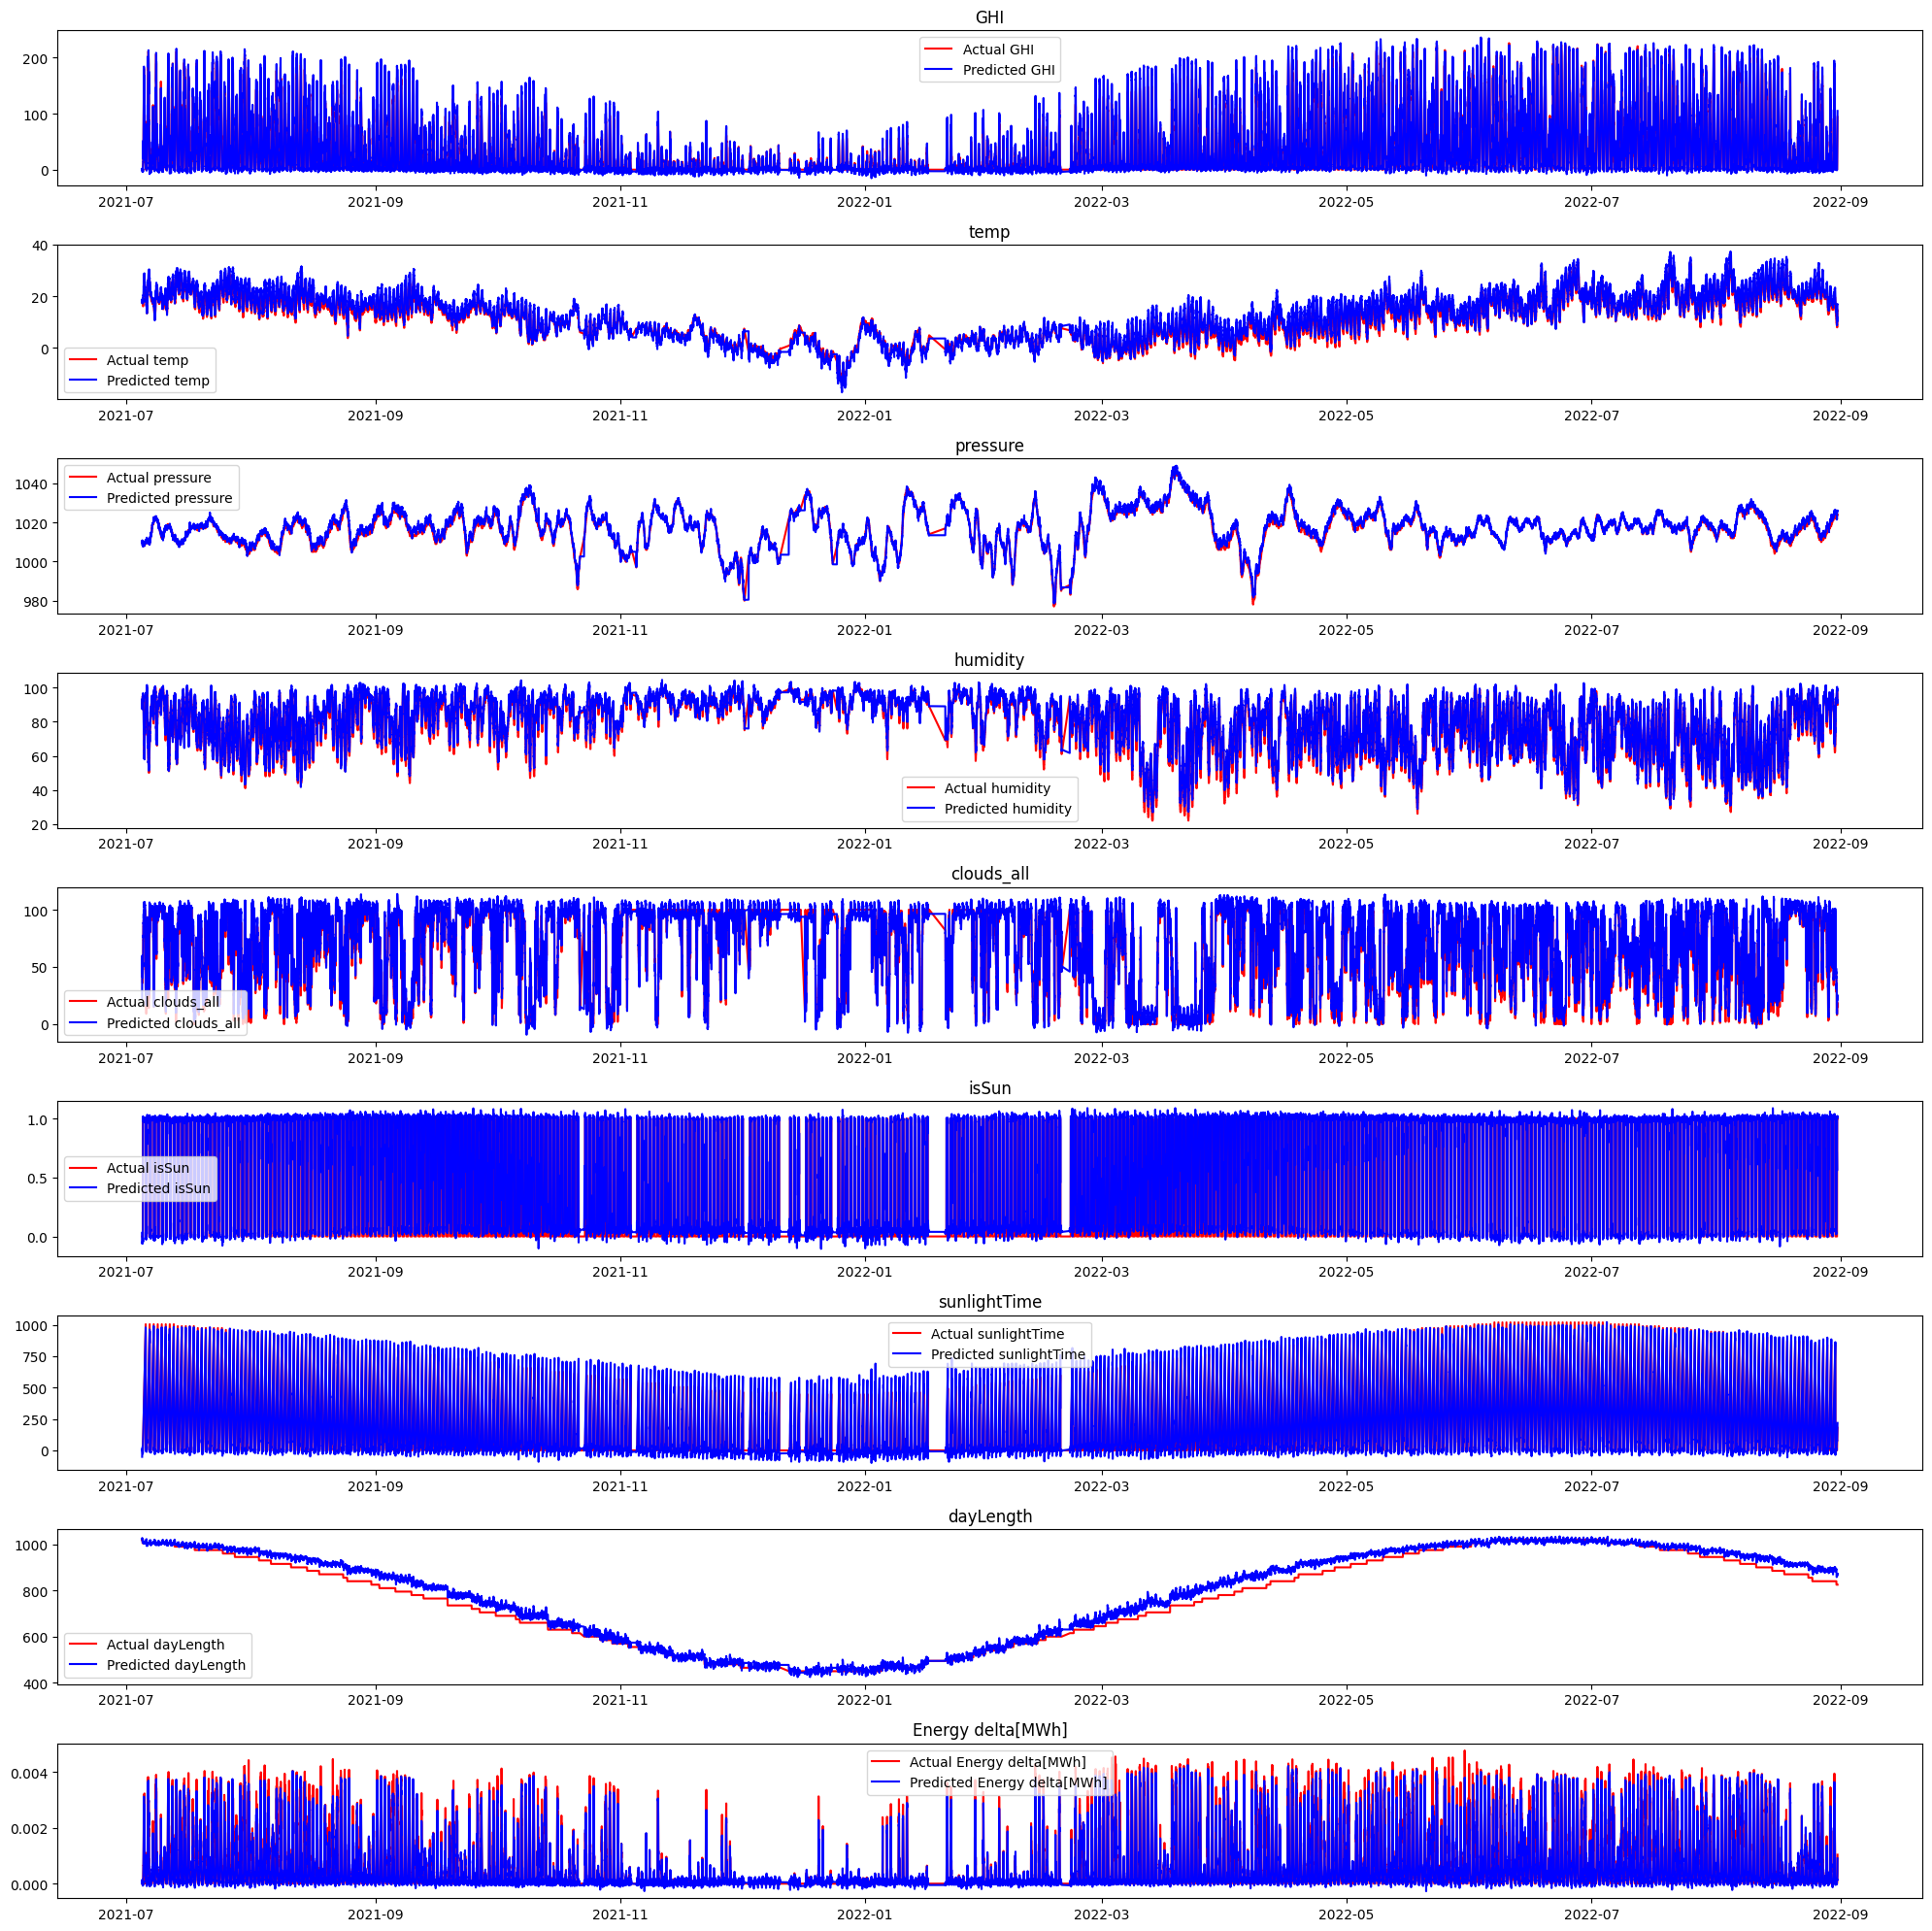

In [71]:
fig ,axes=plt.subplots(len(y_pred_inv_df_gru.columns),1,figsize=(20,20))
for ax,col in zip(axes,y_pred_inv_df_gru.columns):
    ax.plot(y_test_G[col],color='red',label=f'Actual {col}')
    ax.plot(y_pred_inv_df_gru[col],color='blue',label=f'Predicted {col}')
    ax.legend()
    ax.set_title(col)
    ax.set_title(col)

plt.tight_layout()
plt.show()


# **LSTM MODEL**

In [72]:
X_L=X
Y_L=Y
print(X.shape)
st_time='2018-01-01'
X_L

(196776, 8)


GHI  temp  pressure  humidity  clouds_all  isSun  \
Time                                                                     
2017-01-01 00:00:00   0.0   1.6      1021       100         100      0   
2017-01-01 00:15:00   0.0   1.6      1021       100         100      0   
2017-01-01 00:30:00   0.0   1.6      1021       100         100      0   
2017-01-01 00:45:00   0.0   1.6      1021       100         100      0   
2017-01-01 01:00:00   0.0   1.7      1020       100         100      0   
...                   ...   ...       ...       ...         ...    ...   
2022-08-31 16:45:00  23.7  18.6      1023        57          52      1   
2022-08-31 17:00:00  15.6  18.5      1023        61          60      1   
2022-08-31 17:15:00   8.0  18.5      1023        61          60      1   
2022-08-31 17:30:00   2.1  18.5      1023        61          60      1   
2022-08-31 17:45:00   0.0  18.5      1023        61          60      0   

                     sunlightTime  dayLength  
Time                                          
2017-01-01 00:00:00             0        450  
2017-01-01 00:15:00             0        450  
2017-01-01 00:30:00             0        450  
2017-01-01 00:45:00             0        450  
2017-01-01 01:00:00             0        450  
...                           ...        ...  
2022-08-31 16:45:00           780        825  
2022-08-31 17:00:00           795        825  
2022-08-31 17:15:00           810        825  
2022-08-31 17:30:00           825        825  
2022-08-31 17:45:00             0        825  

[196776 rows x 8 columns]

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
X_L

GHI  temp  pressure  humidity  clouds_all  isSun  \
Time                                                                     
2017-01-01 00:00:00   0.0   1.6      1021       100         100      0   
2017-01-01 00:15:00   0.0   1.6      1021       100         100      0   
2017-01-01 00:30:00   0.0   1.6      1021       100         100      0   
2017-01-01 00:45:00   0.0   1.6      1021       100         100      0   
2017-01-01 01:00:00   0.0   1.7      1020       100         100      0   
...                   ...   ...       ...       ...         ...    ...   
2022-08-31 16:45:00  23.7  18.6      1023        57          52      1   
2022-08-31 17:00:00  15.6  18.5      1023        61          60      1   
2022-08-31 17:15:00   8.0  18.5      1023        61          60      1   
2022-08-31 17:30:00   2.1  18.5      1023        61          60      1   
2022-08-31 17:45:00   0.0  18.5      1023        61          60      0   

                     sunlightTime  dayLength  
Time                                          
2017-01-01 00:00:00             0        450  
2017-01-01 00:15:00             0        450  
2017-01-01 00:30:00             0        450  
2017-01-01 00:45:00             0        450  
2017-01-01 01:00:00             0        450  
...                           ...        ...  
2022-08-31 16:45:00           780        825  
2022-08-31 17:00:00           795        825  
2022-08-31 17:15:00           810        825  
2022-08-31 17:30:00           825        825  
2022-08-31 17:45:00             0        825  

[196776 rows x 8 columns]

In [75]:
#normalizing the data
scaler = MinMaxScaler()
# Convert Series to DataFrame
Y_L = Y_L.to_frame()
X_L=pd.concat([X_L,Y_L],axis=1)

scaled_values = scaler.fit_transform(X_L)
scaled_values.shape


(196776, 9)

In [76]:
X_L
features_col=X_L.columns
print(features_col)

Index(['GHI', 'temp', 'pressure', 'humidity', 'clouds_all', 'isSun',
       'sunlightTime', 'dayLength', 'Energy delta[MWh]'],
      dtype='object')


In [77]:
Y_L

Energy delta[MWh]
Time                                  
2017-01-01 00:00:00           0.000000
2017-01-01 00:15:00           0.000000
2017-01-01 00:30:00           0.000000
2017-01-01 00:45:00           0.000000
2017-01-01 01:00:00           0.000000
...                                ...
2022-08-31 16:45:00           0.000118
2022-08-31 17:00:00           0.000082
2022-08-31 17:15:00           0.000051
2022-08-31 17:30:00           0.000024
2022-08-31 17:45:00           0.000000

[196776 rows x 1 columns]

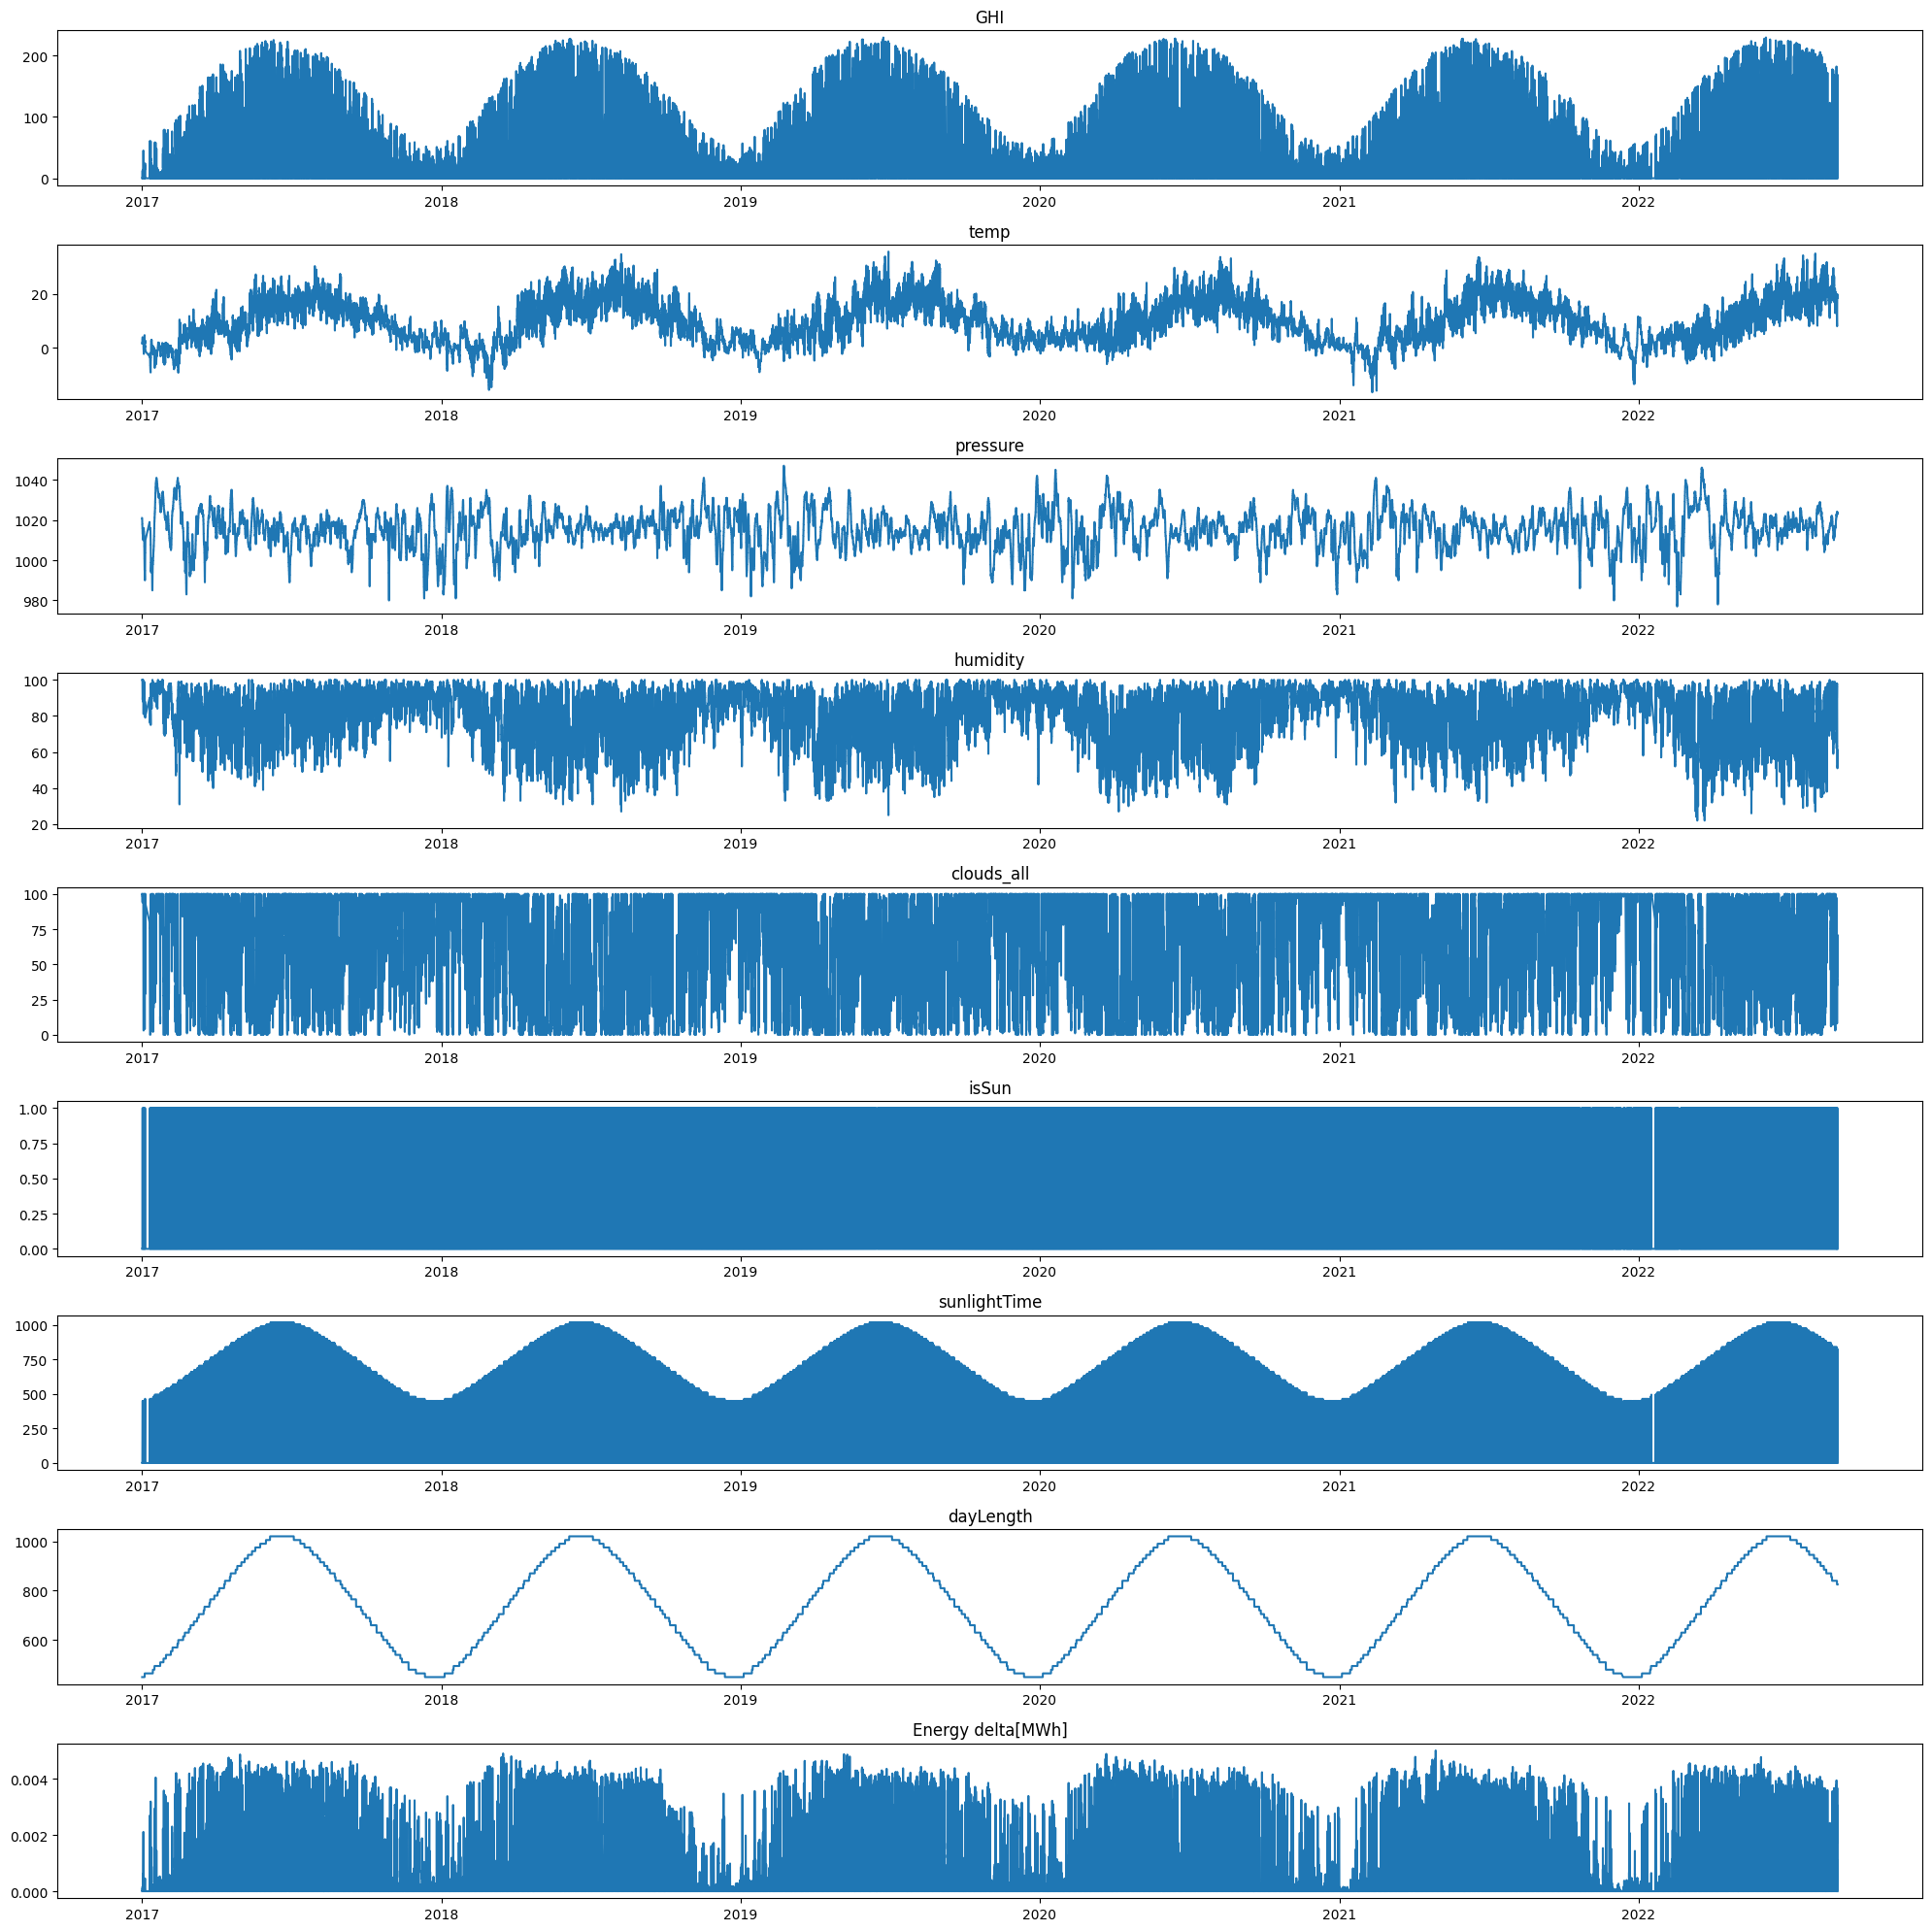

In [78]:
figure, axes = plt.subplots(len(X_L.columns),1,figsize=(20, 20))
start_time = pd.to_datetime('2018-01-01')
end_time = pd.to_datetime('2018-12-31')

for ax,col in zip(axes,X_L.columns):
    ax.plot(X_L[col])
    ax.set_title(col)
    ax.axes.xaxis.set_visible(True)


plt.tight_layout()
plt.show()


In [79]:
import numpy as np

def create_sequence(data, window_size):
    X = []
    y = []
    for i in range(window_size, len(data)):
        # Use numpy slicing instead of iloc
        X.append(data[i-window_size:i])  # Use array slicing
        y.append(data[i])  # Target value for this sequence
    return np.array(X), np.array(y)

X_L_scaled, Y_L_scaled = create_sequence(scaled_values, 60)

# Print the first sequence and corresponding target



In [80]:
X_L_scaled.shape

(196716, 60, 9)

In [81]:
X_L_scaled.shape[1], X_L_scaled.shape[2]

(60, 9)

In [82]:
Y_L_scaled.shape

(196716, 9)

In [83]:
#train-test-split

X_train_L, X_test_L, y_train_L, y_test_L = train_test_split(X_L_scaled, Y_L_scaled, test_size = 0.2, random_state=42,shuffle=False)
X_train_L.shape, y_train_L.shape, X_test_L.shape, y_test_L.shape

((157372, 60, 9), (157372, 9), (39344, 60, 9), (39344, 9))

In [84]:
Y_L_scaled

array([[0.        , 0.38549618, 0.51428571, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.38549618, 0.51428571, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.38549618, 0.51428571, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.03490401, 0.66984733, 0.65714286, ..., 0.79411765, 0.65789474,
        0.01015936],
       [0.0091623 , 0.66984733, 0.65714286, ..., 0.80882353, 0.65789474,
        0.00478088],
       [0.        , 0.66984733, 0.65714286, ..., 0.        , 0.65789474,
        0.        ]])

In [85]:
X_test_L.size

21245760

In [86]:

y_test_L=scaler.inverse_transform(y_test_L)


In [87]:
y_test_L

array([[0.000e+00, 1.780e+01, 1.010e+03, ..., 0.000e+00, 1.020e+03,
        0.000e+00],
       [0.000e+00, 1.780e+01, 1.010e+03, ..., 0.000e+00, 1.020e+03,
        0.000e+00],
       [0.000e+00, 1.780e+01, 1.010e+03, ..., 0.000e+00, 1.020e+03,
        0.000e+00],
       ...,
       [8.000e+00, 1.850e+01, 1.023e+03, ..., 8.100e+02, 8.250e+02,
        5.100e-05],
       [2.100e+00, 1.850e+01, 1.023e+03, ..., 8.250e+02, 8.250e+02,
        2.400e-05],
       [0.000e+00, 1.850e+01, 1.023e+03, ..., 0.000e+00, 8.250e+02,
        0.000e+00]])

In [88]:
X_test_L.shape

(39344, 60, 9)

In [89]:
X_train_L.shape

(157372, 60, 9)

In [90]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [91]:
class TabulerDataset(Dataset):
  def __init__(self ,X,y):
    self.X=torch.tensor(X,dtype=torch.float32)
    self.y=torch.tensor(y,dtype=torch.float32)
  def __len__(self):
    return len(self.X)
  def __getitem__(self,idx):
    return self.X[idx],self.y[idx]

In [92]:
loader=TabulerDataset(X_train_L,y_train_L)

dataloader=DataLoader(loader,batch_size=60,shuffle=False);

In [93]:
len(dataloader)

2623

In [94]:

iterator = iter(dataloader)
X_batch, y_batch = next(iterator)

print(X_batch.shape)
print(y_batch.shape)

torch.Size([60, 60, 9])
torch.Size([60, 9])


In [95]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [96]:
class LSTMblock(nn.Module):
  def __init__(self,input_size,hidden_size,num_layers):
    super(LSTMblock,self).__init__()
    self.hidden_size=hidden_size
    self.num_layers=num_layers
    self.input_size=input_size
    self.lstm1=nn.LSTM(input_size, hidden_size, num_layers=1)
    self.lstm2=nn.LSTM(hidden_size, hidden_size, num_layers=1)
    self.fc=nn.Linear(hidden_size,9)
  def forward(self,x):
    h0=torch.zeros(self.num_layers,x.size(0),self.hidden_size).to(device)
    c0=torch.zeros(self.num_layers,x.size(0),self.hidden_size).to(device)

    h1=torch.zeros(self.num_layers,x.size(0),self.hidden_size).to(device)
    c1=torch.zeros(self.num_layers,x.size(0),self.hidden_size).to(device)

    x=x.to(device)
    out,(h1,c1)=self.lstm1(x,(h0,c0))
    out,(h1,c1)=self.lstm2(out,(h1,c1))
    out=self.fc(out[: ,-1 , :])
    return out



In [97]:
X_train_L.shape

(157372, 60, 9)

In [98]:
lstm=LSTMblock(X_train_L.shape[2],64,1).to(device)
loss_fn=nn.MSELoss()
optimizer=torch.optim.Adam(lstm.parameters(),lr=0.001)


In [99]:
def train_lstm(model,dataloader,loss_fn,optimizer,device,epochs):
  for epochs in range(epochs):
    total_loss=0
    for i,(X_batch,y_batch) in enumerate(dataloader):
      if(i==len(dataloader)-1):
        break
      X_batch=X_batch.to(device)
      y_batch=y_batch.to(device)

      y_pred=model(X_batch)

      loss=loss_fn(y_pred,y_batch)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      total_loss+=loss
    avg_loss=total_loss/len(dataloader)
    print(f'The avg loss in EPOCH:{epochs} is {avg_loss}')



In [100]:
# train_lstm(lstm,dataloader,loss_fn,optimizer,device,30)

In [101]:
# torch.save(lstm.state_dict(),'/content/drive/MyDrive/XAI /Other data/SAVEDMODEL PV/lstm_model')

In [102]:
model_lstm=LSTMblock(X_train_L.shape[2],64,1).to(device)
model_lstm.load_state_dict(torch.load('/content/drive/MyDrive/XAI /Other data/SAVEDMODEL PV/lstm_model'))
model_lstm.eval()

LSTMblock(
  (lstm1): LSTM(9, 64)
  (lstm2): LSTM(64, 64)
  (fc): Linear(in_features=64, out_features=9, bias=True)
)

In [103]:
X_test_L.shape

(39344, 60, 9)

In [104]:
y_test_L.shape

(39344, 9)

In [105]:
test_loader=TabulerDataset(X_test_L,y_test_L)
test_loader=DataLoader(test_loader,batch_size=60,shuffle=False)


In [106]:
len(test_loader)

656

In [107]:
lstm.eval()
cou=0
predicted=[]
with torch.no_grad():
    for i, (X_batch, y_batch) in enumerate(test_loader):
        if i == (len(test_loader) - 1):
          continue
        X_batch = X_batch.to(device)
        yPred = model_lstm(X_batch)
        predicted.append(yPred.cpu().numpy())




In [108]:

predicted=np.array(predicted)

In [109]:
predicted.shape

(655, 60, 9)

In [110]:
predicted=predicted.reshape(-1,9)
predicted.shape

(39300, 9)

In [111]:
yPredDF = pd.DataFrame(predicted)
y_pred_inv_df =yPredDF
y_pred_inv_df.columns=X_L.columns




In [112]:
y_pred_inv_df=scaler.inverse_transform(y_pred_inv_df)

In [113]:
y_pred_inv_df=pd.DataFrame(y_pred_inv_df)
y_pred_inv_df.columns=X_L.columns

In [114]:
y_pred_inv_df.shape

(39300, 9)

In [115]:
y_test_L.shape

(39344, 9)

In [116]:
# Trim index so its length becomes exactly 39300
trimmed_index = X_L.index[-len(y_test_L):][:-44]

# Now assign this to prediction DataFrame
y_pred_inv_df.index = trimmed_index

In [117]:
y_pred_inv_df

GHI       temp     pressure   humidity  \
Time                                                                 
2021-07-04 22:00:00    0.401952  18.538038  1010.098389  92.359985   
2021-07-04 22:15:00   -1.558743  18.138519  1009.410156  89.412590   
2021-07-04 22:30:00   -1.091767  19.099525  1009.387878  88.805428   
2021-07-04 22:45:00   -0.660740  17.834518  1009.411377  89.939629   
2021-07-04 23:00:00   -0.158223  17.741806  1009.185242  90.108871   
...                         ...        ...          ...        ...   
2022-08-31 05:45:00   58.933342   9.932405  1023.538513  94.811378   
2022-08-31 06:00:00   69.747696  10.584996  1023.328186  92.360825   
2022-08-31 06:15:00   82.080444  16.048607  1023.197571  89.993996   
2022-08-31 06:30:00   90.729240  15.760399  1023.254456  89.727760   
2022-08-31 06:45:00  102.227913  15.621990  1022.748962  89.522934   

                     clouds_all     isSun  sunlightTime    dayLength  \
Time                                                                   
2021-07-04 22:00:00   22.476957 -0.025102      3.520177  1016.820068   
2021-07-04 22:15:00   54.979027 -0.015015     11.190339  1019.024719   
2021-07-04 22:30:00   55.672516  0.008205      1.102868  1021.605225   
2021-07-04 22:45:00   54.454567 -0.001997      2.475552  1017.793213   
2021-07-04 23:00:00   59.313236 -0.000671      1.211588  1019.012695   
...                         ...       ...           ...          ...   
2022-08-31 05:45:00   15.372166  0.998575    145.099396   915.302368   
2022-08-31 06:00:00   18.211264  1.000223    162.055954   913.826294   
2022-08-31 06:15:00   13.040990  1.014625    180.321426   913.606812   
2022-08-31 06:30:00   11.172271  1.004038    189.520660   913.552856   
2022-08-31 06:45:00   12.075811  0.999504    212.469543   913.771179   

                     Energy delta[MWh]  
Time                                    
2021-07-04 22:00:00          -0.000028  
2021-07-04 22:15:00           0.000006  
2021-07-04 22:30:00           0.000018  
2021-07-04 22:45:00           0.000013  
2021-07-04 23:00:00           0.000005  
...                                ...  
2022-08-31 05:45:00           0.000139  
2022-08-31 06:00:00           0.000169  
2022-08-31 06:15:00           0.000251  
2022-08-31 06:30:00           0.000530  
2022-08-31 06:45:00           0.000748  

[39300 rows x 9 columns]

In [118]:
y_test_L=pd.DataFrame(y_test_L)
y_test_L.columns=X_L.columns
y_test_L=y_test_L[:-44]
y_test_L.index=trimmed_index
y_test_L

GHI  temp  pressure  humidity  clouds_all  isSun  \
Time                                                                     
2021-07-04 22:00:00   0.0  17.8    1010.0      88.0        53.0    0.0   
2021-07-04 22:15:00   0.0  17.8    1010.0      88.0        53.0    0.0   
2021-07-04 22:30:00   0.0  17.8    1010.0      88.0        53.0    0.0   
2021-07-04 22:45:00   0.0  17.8    1010.0      88.0        53.0    0.0   
2021-07-04 23:00:00   0.0  17.3    1010.0      93.0        42.0    0.0   
...                   ...   ...       ...       ...         ...    ...   
2022-08-31 05:45:00  54.9   8.1    1024.0      96.0        19.0    1.0   
2022-08-31 06:00:00  64.9  14.6    1024.0      90.0        15.0    1.0   
2022-08-31 06:15:00  74.8  14.6    1024.0      90.0        15.0    1.0   
2022-08-31 06:30:00  84.5  14.6    1024.0      90.0        15.0    1.0   
2022-08-31 06:45:00  94.1  14.6    1024.0      90.0        15.0    1.0   

                     sunlightTime  dayLength  Energy delta[MWh]  
Time                                                             
2021-07-04 22:00:00           0.0     1020.0           0.000000  
2021-07-04 22:15:00           0.0     1020.0           0.000000  
2021-07-04 22:30:00           0.0     1020.0           0.000000  
2021-07-04 22:45:00           0.0     1020.0           0.000000  
2021-07-04 23:00:00           0.0     1020.0           0.000000  
...                           ...        ...                ...  
2022-08-31 05:45:00         120.0      825.0           0.000162  
2022-08-31 06:00:00         135.0      825.0           0.000181  
2022-08-31 06:15:00         150.0      825.0           0.000377  
2022-08-31 06:30:00         165.0      825.0           0.000634  
2022-08-31 06:45:00         180.0      825.0           0.001040  

[39300 rows x 9 columns]

In [119]:
def mean_squared_error(y_true,y_pred):
  return np.mean((y_true-y_pred)**2)

def mean_absolute_error(y_true,y_pred):
  return np.mean(np.abs(y_true-y_pred))

def root_mean_squared_error(y_true,y_pred):
  return np.sqrt(mean_squared_error(y_true,y_pred))


MSE:8.323037475695387e-08
MAE:0.0001549224878089504
RMSE:0.00028849674999374583


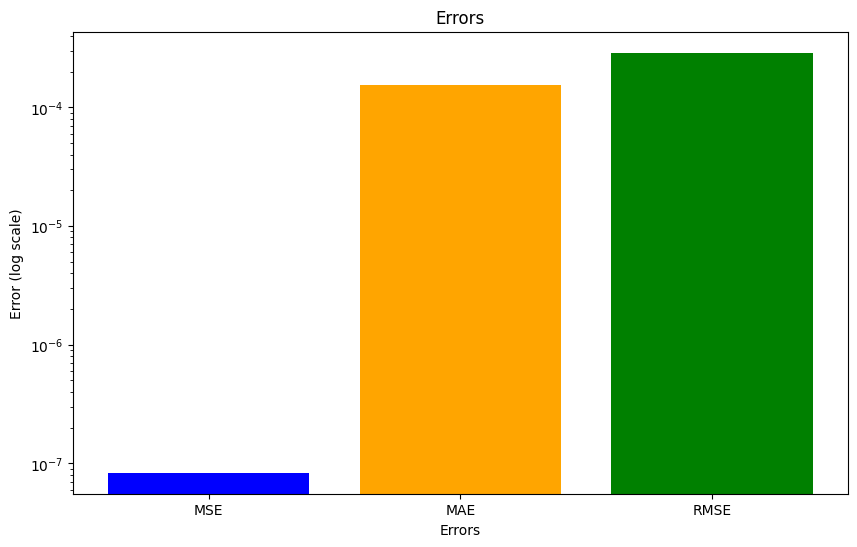

In [120]:
mse_l=mean_squared_error(y_test_L['Energy delta[MWh]'],y_pred_inv_df['Energy delta[MWh]']);
mae_l=mean_absolute_error(y_test_L['Energy delta[MWh]'],y_pred_inv_df['Energy delta[MWh]']);
rmse_l=root_mean_squared_error(y_test_L['Energy delta[MWh]'],y_pred_inv_df['Energy delta[MWh]']);
print(f'MSE:{mse_l}\nMAE:{mae_l}\nRMSE:{rmse_l}')
plt.figure(figsize=(10, 6))
errors={'MSE' : mse_l , 'MAE' : mae_l ,'RMSE' : rmse_l }
plt.bar(errors.keys(),errors.values() , color=['blue', 'orange', 'green']);
plt.xlabel('Errors')
plt.yscale('log')  # Apply log scale to y-axis
plt.ylabel('Error (log scale)')
plt.title('Errors')
plt.show()


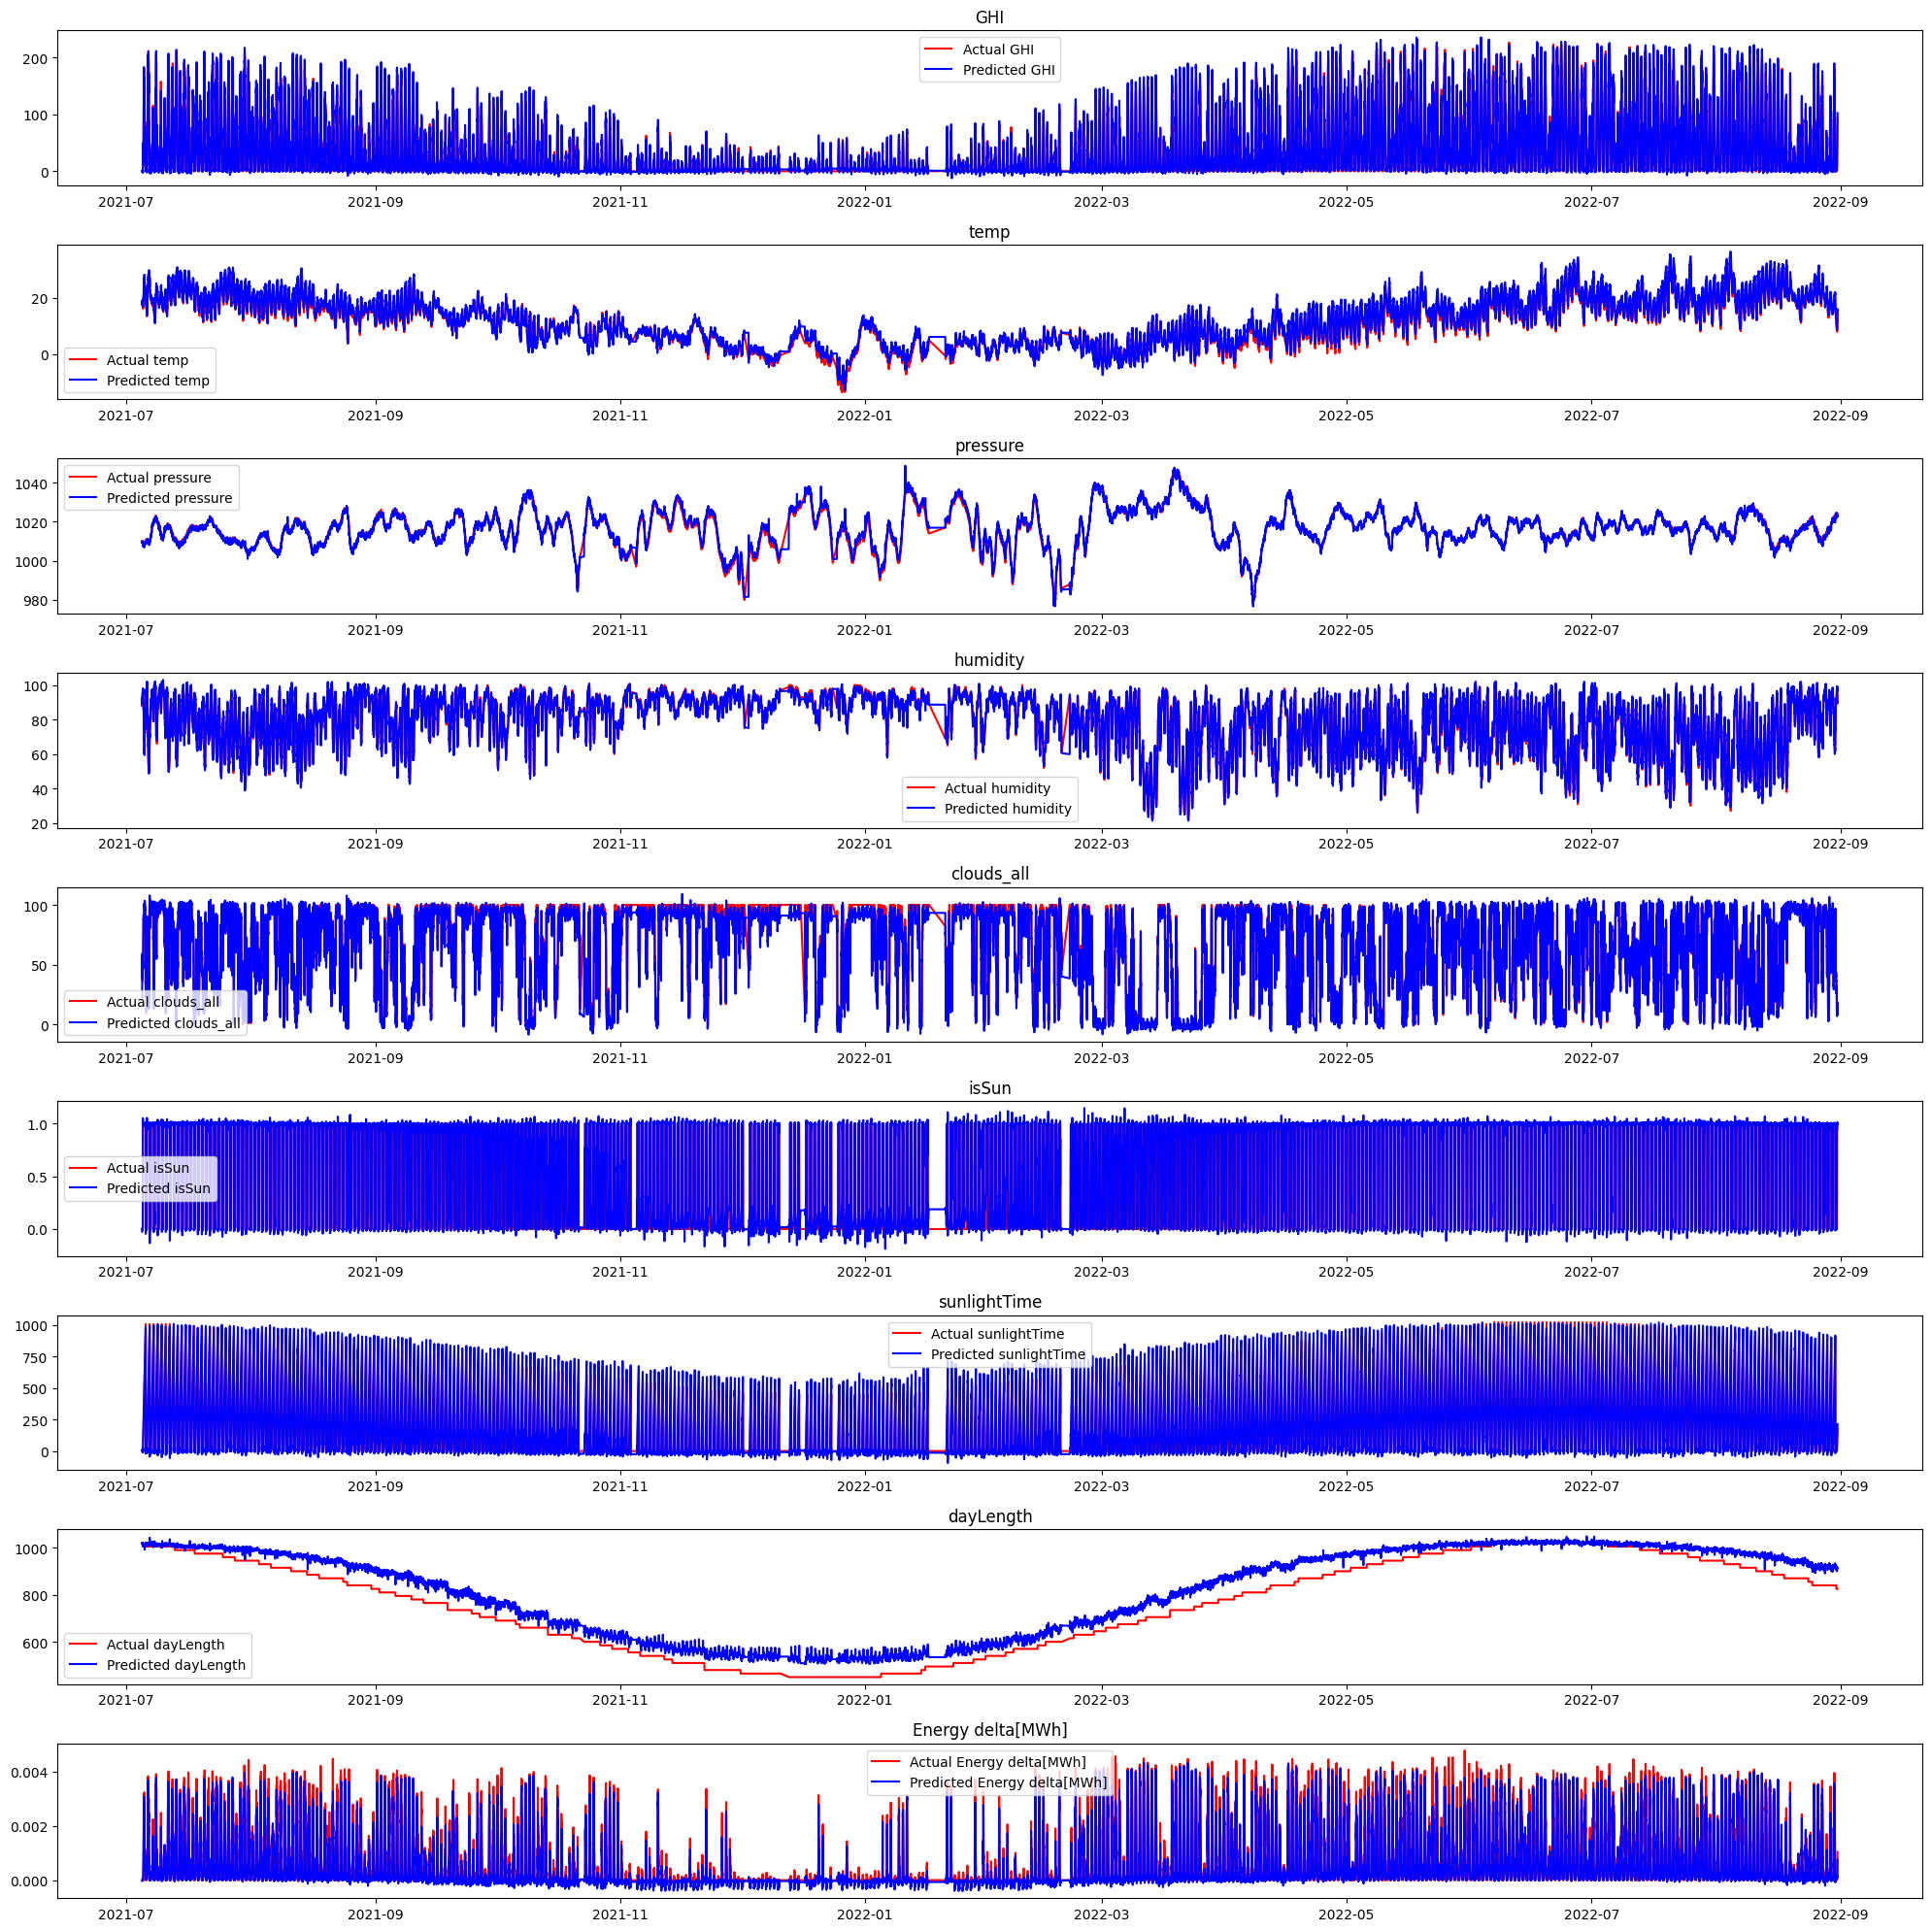

In [121]:
fig ,axes=plt.subplots(len(y_pred_inv_df.columns),1,figsize=(20,20))
for ax,col in zip(axes,y_pred_inv_df.columns):
    ax.plot(y_test_L[col],color='red',label=f'Actual {col}')
    ax.plot(y_pred_inv_df[col],color='blue',label=f'Predicted {col}')
    ax.legend()
    ax.set_title(col)
    ax.set_title(col)

plt.tight_layout()
plt.show()


# **TRANSFORMER MODEL**

In [122]:
X_T=X
Y_T=Y
print(X.shape)
st_time='2018-01-01'
X_T

(196776, 8)


GHI  temp  pressure  humidity  clouds_all  isSun  \
Time                                                                     
2017-01-01 00:00:00   0.0   1.6      1021       100         100      0   
2017-01-01 00:15:00   0.0   1.6      1021       100         100      0   
2017-01-01 00:30:00   0.0   1.6      1021       100         100      0   
2017-01-01 00:45:00   0.0   1.6      1021       100         100      0   
2017-01-01 01:00:00   0.0   1.7      1020       100         100      0   
...                   ...   ...       ...       ...         ...    ...   
2022-08-31 16:45:00  23.7  18.6      1023        57          52      1   
2022-08-31 17:00:00  15.6  18.5      1023        61          60      1   
2022-08-31 17:15:00   8.0  18.5      1023        61          60      1   
2022-08-31 17:30:00   2.1  18.5      1023        61          60      1   
2022-08-31 17:45:00   0.0  18.5      1023        61          60      0   

                     sunlightTime  dayLength  
Time                                          
2017-01-01 00:00:00             0        450  
2017-01-01 00:15:00             0        450  
2017-01-01 00:30:00             0        450  
2017-01-01 00:45:00             0        450  
2017-01-01 01:00:00             0        450  
...                           ...        ...  
2022-08-31 16:45:00           780        825  
2022-08-31 17:00:00           795        825  
2022-08-31 17:15:00           810        825  
2022-08-31 17:30:00           825        825  
2022-08-31 17:45:00             0        825  

[196776 rows x 8 columns]

In [123]:
from sklearn.preprocessing import MinMaxScaler

In [124]:
X_T

GHI  temp  pressure  humidity  clouds_all  isSun  \
Time                                                                     
2017-01-01 00:00:00   0.0   1.6      1021       100         100      0   
2017-01-01 00:15:00   0.0   1.6      1021       100         100      0   
2017-01-01 00:30:00   0.0   1.6      1021       100         100      0   
2017-01-01 00:45:00   0.0   1.6      1021       100         100      0   
2017-01-01 01:00:00   0.0   1.7      1020       100         100      0   
...                   ...   ...       ...       ...         ...    ...   
2022-08-31 16:45:00  23.7  18.6      1023        57          52      1   
2022-08-31 17:00:00  15.6  18.5      1023        61          60      1   
2022-08-31 17:15:00   8.0  18.5      1023        61          60      1   
2022-08-31 17:30:00   2.1  18.5      1023        61          60      1   
2022-08-31 17:45:00   0.0  18.5      1023        61          60      0   

                     sunlightTime  dayLength  
Time                                          
2017-01-01 00:00:00             0        450  
2017-01-01 00:15:00             0        450  
2017-01-01 00:30:00             0        450  
2017-01-01 00:45:00             0        450  
2017-01-01 01:00:00             0        450  
...                           ...        ...  
2022-08-31 16:45:00           780        825  
2022-08-31 17:00:00           795        825  
2022-08-31 17:15:00           810        825  
2022-08-31 17:30:00           825        825  
2022-08-31 17:45:00             0        825  

[196776 rows x 8 columns]

In [125]:
#normalizing the data
scaler = MinMaxScaler()
# Convert Series to DataFrame
Y_T = Y_T.to_frame()
X_T=pd.concat([X_T,Y_T],axis=1)

scaled_values = scaler.fit_transform(X_T)
scaled_values.shape


(196776, 9)

In [126]:
X_T
features_col=X_T.columns
print(features_col)

Index(['GHI', 'temp', 'pressure', 'humidity', 'clouds_all', 'isSun',
       'sunlightTime', 'dayLength', 'Energy delta[MWh]'],
      dtype='object')


In [127]:
Y_T

Energy delta[MWh]
Time                                  
2017-01-01 00:00:00           0.000000
2017-01-01 00:15:00           0.000000
2017-01-01 00:30:00           0.000000
2017-01-01 00:45:00           0.000000
2017-01-01 01:00:00           0.000000
...                                ...
2022-08-31 16:45:00           0.000118
2022-08-31 17:00:00           0.000082
2022-08-31 17:15:00           0.000051
2022-08-31 17:30:00           0.000024
2022-08-31 17:45:00           0.000000

[196776 rows x 1 columns]

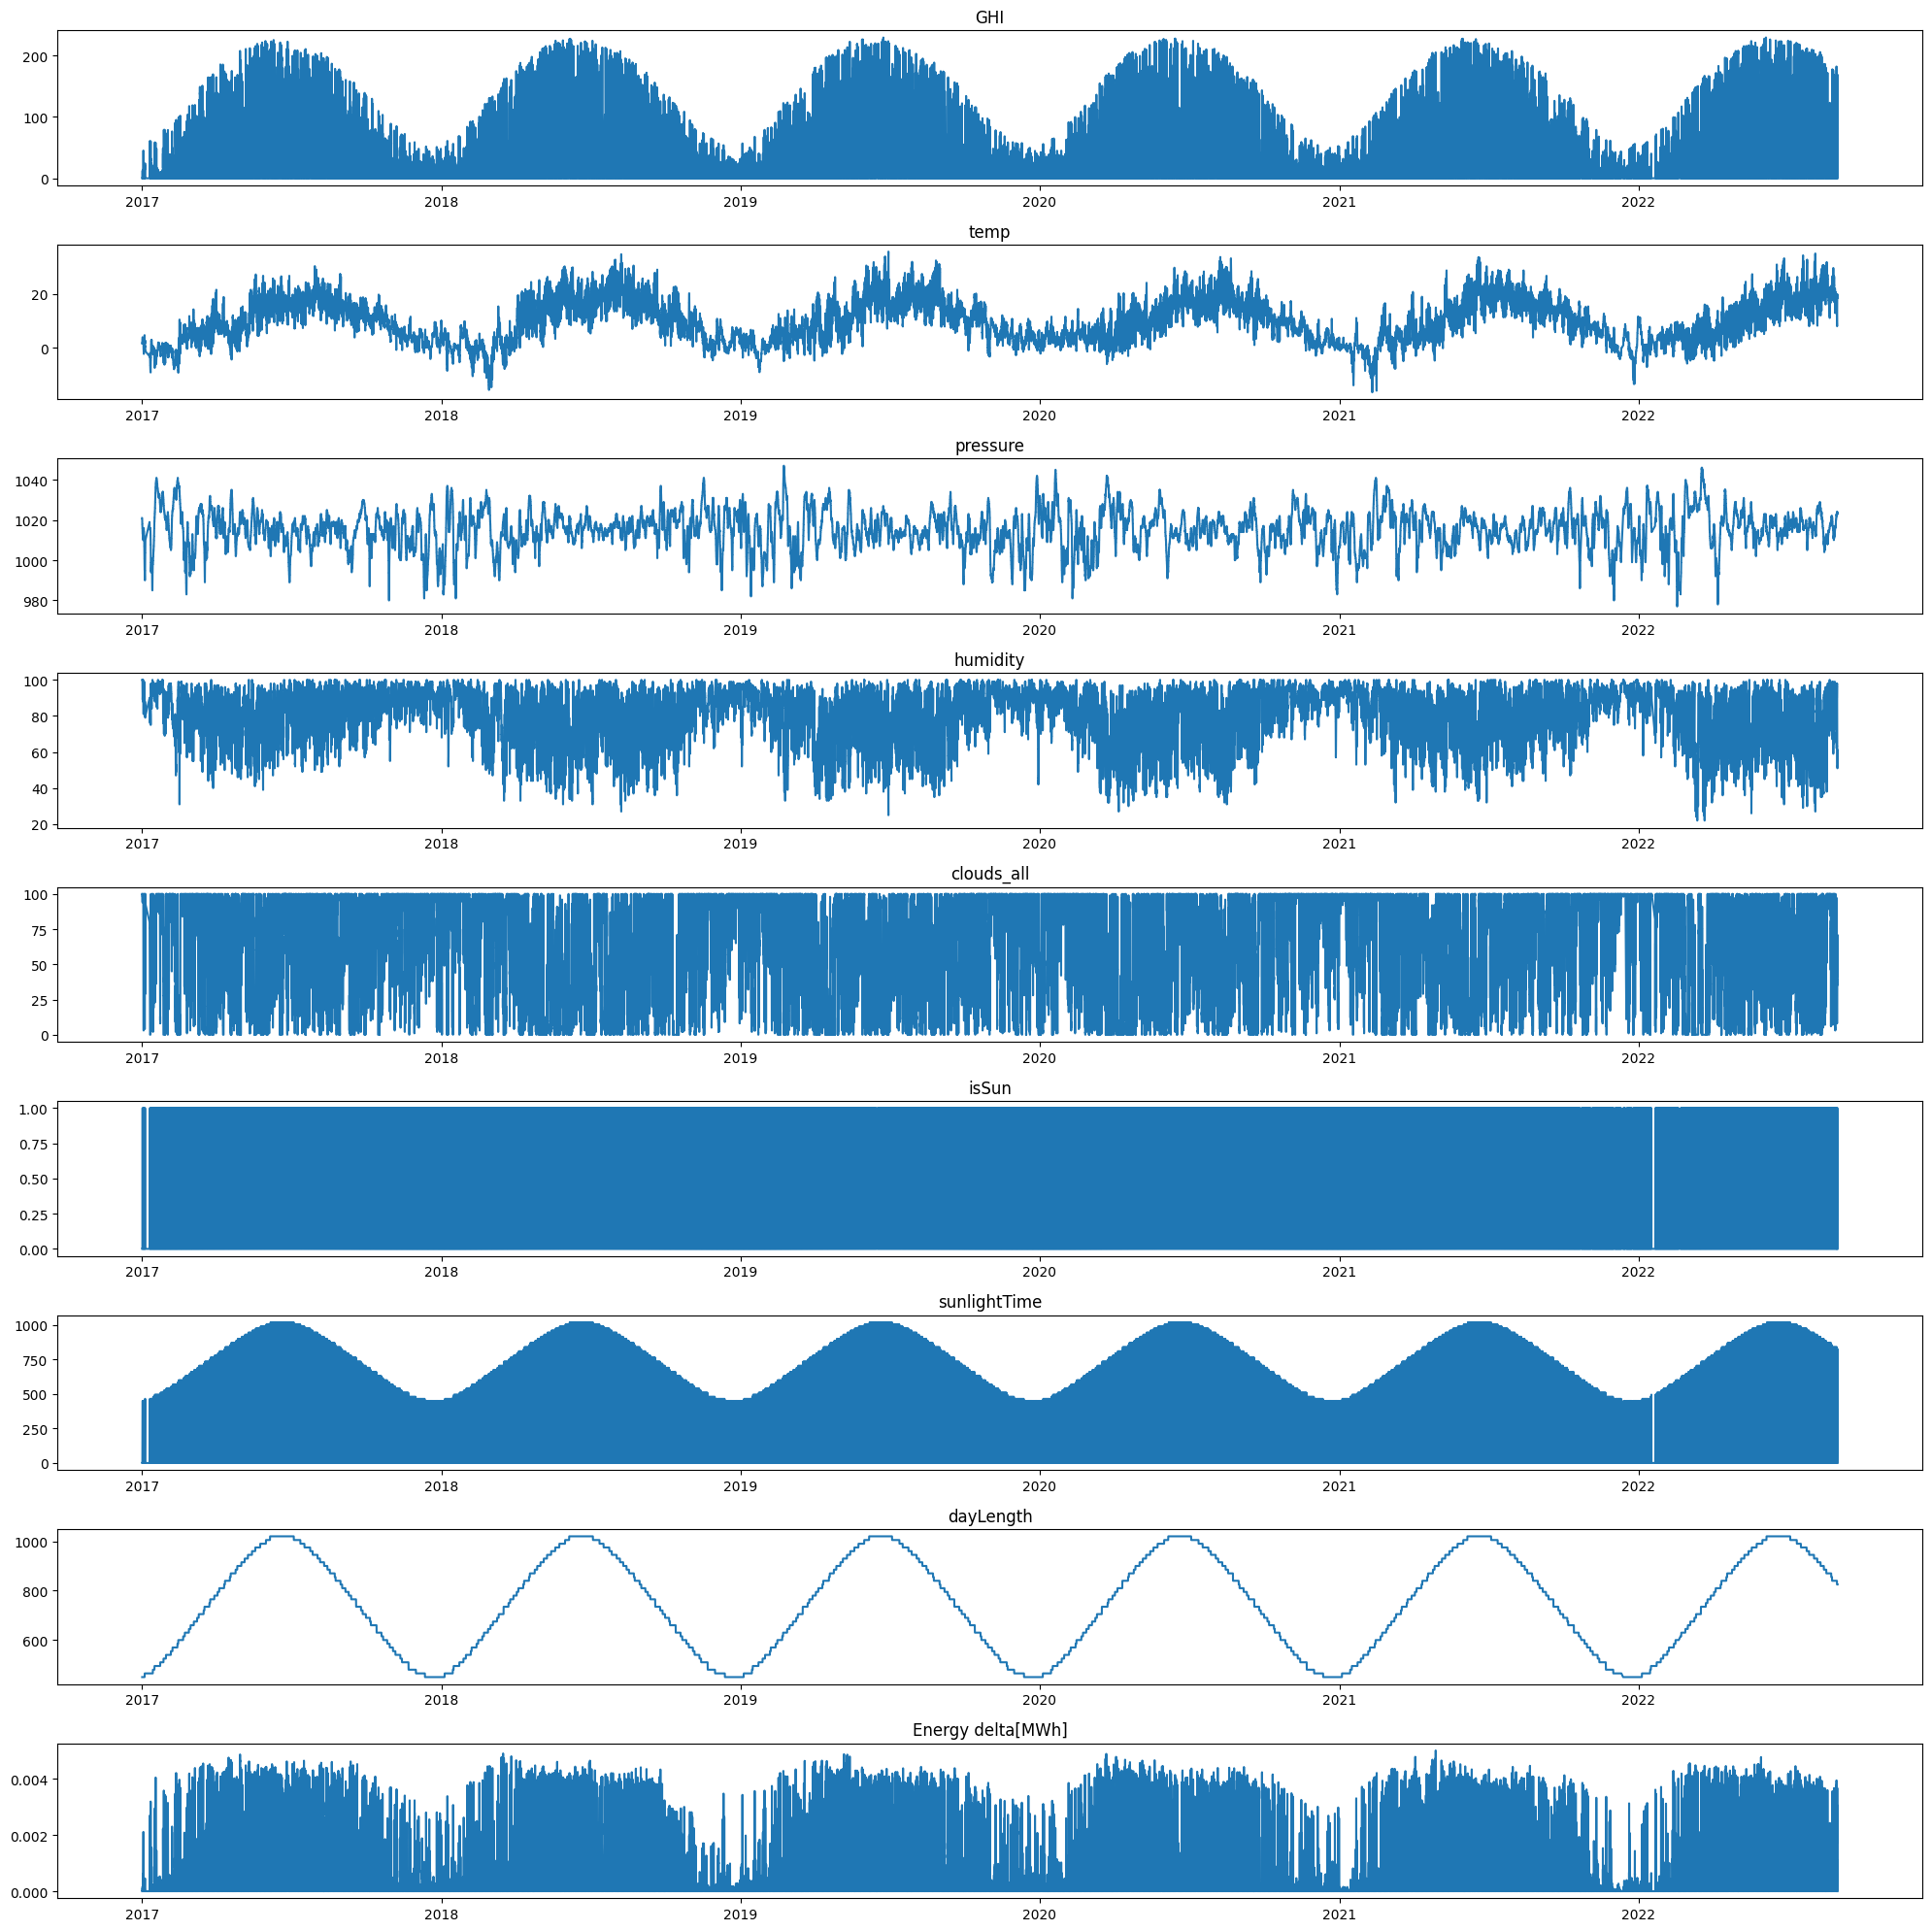

In [128]:
figure, axes = plt.subplots(len(X_T.columns),1,figsize=(20, 20))
start_time = pd.to_datetime('2018-01-01')
end_time = pd.to_datetime('2018-12-31')

for ax,col in zip(axes,X_T.columns):
    ax.plot(X_T[col])
    ax.set_title(col)
    ax.axes.xaxis.set_visible(True)


plt.tight_layout()
plt.show()


In [129]:
import numpy as np

def create_sequence(data, window_size):
    X = []
    y = []
    for i in range(window_size, len(data)):
        # Use numpy slicing instead of iloc
        X.append(data[i-window_size:i])  # Use array slicing
        y.append(data[i])  # Target value for this sequence
    return np.array(X), np.array(y)

X_T_scaled, Y_T_scaled = create_sequence(scaled_values, 60)

# Print the first sequence and corresponding target



In [130]:
X_T_scaled.shape

(196716, 60, 9)

In [131]:
X_T_scaled.shape[1], X_T_scaled.shape[2]

(60, 9)

In [132]:
Y_T_scaled.shape

(196716, 9)

In [133]:
from sklearn.model_selection import train_test_split

X_train_T, X_test_T, y_train_T, y_test_T = train_test_split(X_L_scaled, Y_L_scaled, test_size = 0.2, random_state=42,shuffle=False)
X_train_T.shape, y_train_T.shape, X_test_T.shape, y_test_T.shape

((157372, 60, 9), (157372, 9), (39344, 60, 9), (39344, 9))

In [134]:
Y_T_scaled

array([[0.        , 0.38549618, 0.51428571, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.38549618, 0.51428571, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.38549618, 0.51428571, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.03490401, 0.66984733, 0.65714286, ..., 0.79411765, 0.65789474,
        0.01015936],
       [0.0091623 , 0.66984733, 0.65714286, ..., 0.80882353, 0.65789474,
        0.00478088],
       [0.        , 0.66984733, 0.65714286, ..., 0.        , 0.65789474,
        0.        ]])

In [135]:
X_test_T.size

21245760

In [136]:

y_test_T=scaler.inverse_transform(y_test_T)


In [137]:
y_test_T

array([[0.000e+00, 1.780e+01, 1.010e+03, ..., 0.000e+00, 1.020e+03,
        0.000e+00],
       [0.000e+00, 1.780e+01, 1.010e+03, ..., 0.000e+00, 1.020e+03,
        0.000e+00],
       [0.000e+00, 1.780e+01, 1.010e+03, ..., 0.000e+00, 1.020e+03,
        0.000e+00],
       ...,
       [8.000e+00, 1.850e+01, 1.023e+03, ..., 8.100e+02, 8.250e+02,
        5.100e-05],
       [2.100e+00, 1.850e+01, 1.023e+03, ..., 8.250e+02, 8.250e+02,
        2.400e-05],
       [0.000e+00, 1.850e+01, 1.023e+03, ..., 0.000e+00, 8.250e+02,
        0.000e+00]])

In [138]:
X_test_T.shape

(39344, 60, 9)

In [139]:
X_train_T.shape

(157372, 60, 9)

In [140]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [141]:
class TabulerDataset(Dataset):
  def __init__(self ,X,y):
    self.X=torch.tensor(X,dtype=torch.float32)
    self.y=torch.tensor(y,dtype=torch.float32)
  def __len__(self):
    return len(self.X)
  def __getitem__(self,idx):
    return self.X[idx],self.y[idx]

In [142]:
loader=TabulerDataset(X_train_T,y_train_T)

dataloader=DataLoader(loader,batch_size=60,shuffle=False);

In [143]:
len(dataloader)

2623

In [144]:

iterator = iter(dataloader)
X_batch, y_batch = next(iterator)

print(X_batch.shape)
print(y_batch.shape)

torch.Size([60, 60, 9])
torch.Size([60, 9])


In [145]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [146]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

In [147]:
# Model definition using Transformer
class TransformerModel(nn.Module):
    def __init__(self, input_dim=9, d_model=60, nhead=4, num_layers=2, dropout=0.2):
        super(TransformerModel, self).__init__()

        self.encoder = nn.Linear(input_dim, d_model)
        self.pos_encoder = PositionalEncoding(d_model, dropout)
        encoder_layers = nn.TransformerEncoderLayer(d_model, nhead)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers)
        self.decoder = nn.Linear(d_model, 9)

    def forward(self, x):
        x = self.encoder(x)
        x = self.pos_encoder(x)
        x = self.transformer_encoder(x)
        x = self.decoder(x[:, -1, :])
        return x

transformer = TransformerModel().to(device)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [148]:
X_train_T.shape

(157372, 60, 9)

In [149]:
loss_fn=nn.MSELoss()
optimizer=torch.optim.Adam(transformer.parameters(),lr=0.001)

In [150]:
def train_transformer(model,dataloader,loss_fn,optimizer,device,epochs):
  for epochs in range(epochs):
    total_loss=0
    for i,(X_batch,y_batch) in enumerate(dataloader):
      if(i==len(dataloader)-1):
        break
      X_batch=X_batch.to(device)
      y_batch=y_batch.to(device)

      y_pred=model(X_batch)

      loss=loss_fn(y_pred,y_batch)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      total_loss+=loss
    avg_loss=total_loss/len(dataloader)
    print(f'The avg loss in EPOCH:{epochs} is {avg_loss}')



In [151]:
# train_transformer(transformer,dataloader,loss_fn,optimizer,device,30)

In [152]:
# torch.save(transformer.state_dict(),'/content/drive/MyDrive/XAI /Other data/SAVEDMODEL PV/transformer_model.pt')

In [153]:
model_transformer=TransformerModel().to(device)
model_transformer.load_state_dict(torch.load('/content/drive/MyDrive/XAI /Other data/SAVEDMODEL PV/transformer_model.pt'))
model_transformer.eval()

TransformerModel(
  (encoder): Linear(in_features=9, out_features=60, bias=True)
  (pos_encoder): PositionalEncoding(
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=60, out_features=60, bias=True)
        )
        (linear1): Linear(in_features=60, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=60, bias=True)
        (norm1): LayerNorm((60,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((60,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (decoder): Linear(in_features=60, out_features=9, bias=True)
)

In [154]:
X_test_T.shape

(39344, 60, 9)

In [155]:
y_test_T.shape

(39344, 9)

In [156]:
test_loader=TabulerDataset(X_test_T,y_test_T)
test_loader=DataLoader(test_loader,batch_size=60,shuffle=False)


In [157]:
len(test_loader)

656

In [158]:
transformer.eval()
cou=0
predicted=[]
with torch.no_grad():
    for i, (X_batch, y_batch) in enumerate(test_loader):
        if i == (len(test_loader) - 1):
          continue
        X_batch = X_batch.to(device)
        yPred = model_transformer(X_batch)
        predicted.append(yPred.cpu().numpy())




In [159]:

predicted=np.array(predicted)

In [160]:
predicted.shape

(655, 60, 9)

In [161]:
predicted=predicted.reshape(-1,9)
predicted.shape

(39300, 9)

In [162]:
yPredDF = pd.DataFrame(predicted)
y_pred_inv_df_t =yPredDF
y_pred_inv_df_t.columns=X_T.columns




In [163]:
y_pred_inv_df_t=scaler.inverse_transform(y_pred_inv_df_t)

In [164]:
y_pred_inv_df_t=pd.DataFrame(y_pred_inv_df_t)
y_pred_inv_df_t.columns=X_T.columns

In [165]:
y_pred_inv_df_t.shape

(39300, 9)

In [166]:
y_test_T.shape

(39344, 9)

In [167]:
# Trim index so its length becomes exactly 39300
trimmed_index = X_T.index[-len(y_test_T):][:-44]

# Now assign this to prediction DataFrame
y_pred_inv_df_t.index = trimmed_index

In [168]:
y_pred_inv_df_t

GHI       temp     pressure   humidity  clouds_all  \
Time                                                                            
2021-07-04 22:00:00  -3.937430  16.601707  1007.827820  87.977608   49.821342   
2021-07-04 22:15:00  -4.260542  16.727201  1007.626038  87.647293   53.189648   
2021-07-04 22:30:00  -4.504589  16.663277  1007.666199  88.016167   53.444458   
2021-07-04 22:45:00  -4.651531  16.437845  1007.834595  89.145622   51.862644   
2021-07-04 23:00:00  -4.592227  16.018278  1008.193787  91.054352   47.508747   
...                        ...        ...          ...        ...         ...   
2022-08-31 05:45:00  64.241295  15.073483  1023.932861  89.837517    3.983361   
2022-08-31 06:00:00  79.999992  16.237932  1023.713989  86.128853    3.692847   
2022-08-31 06:15:00  89.730133  16.772751  1023.624939  84.630722    3.684966   
2022-08-31 06:30:00  95.178520  16.981918  1023.693542  84.027405    3.729056   
2022-08-31 06:45:00  95.663040  16.991516  1023.721069  83.966690    3.749405   

                        isSun  sunlightTime    dayLength  Energy delta[MWh]  
Time                                                                         
2021-07-04 22:00:00 -0.029495    -19.211800  1016.924500          -0.000067  
2021-07-04 22:15:00 -0.028977    -19.360401  1018.165894          -0.000067  
2021-07-04 22:30:00 -0.029040    -19.577690  1018.428101          -0.000068  
2021-07-04 22:45:00 -0.029504    -20.123173  1018.231689          -0.000069  
2021-07-04 23:00:00 -0.029917    -21.065248  1016.990173          -0.000070  
...                       ...           ...          ...                ...  
2022-08-31 05:45:00  1.014175    109.211067  1008.072144           0.000291  
2022-08-31 06:00:00  1.012741    141.300339  1005.427185           0.000426  
2022-08-31 06:15:00  1.012523    157.037155  1003.973999           0.000566  
2022-08-31 06:30:00  1.013791    164.627548  1003.048767           0.000674  
2022-08-31 06:45:00  1.014188    165.396820  1002.835938           0.000689  

[39300 rows x 9 columns]

In [169]:
y_test_T=pd.DataFrame(y_test_T)
y_test_T.columns=X_T.columns
y_test_T=y_test_T[:-44]
y_test_T.index=trimmed_index
y_test_T

GHI  temp  pressure  humidity  clouds_all  isSun  \
Time                                                                     
2021-07-04 22:00:00   0.0  17.8    1010.0      88.0        53.0    0.0   
2021-07-04 22:15:00   0.0  17.8    1010.0      88.0        53.0    0.0   
2021-07-04 22:30:00   0.0  17.8    1010.0      88.0        53.0    0.0   
2021-07-04 22:45:00   0.0  17.8    1010.0      88.0        53.0    0.0   
2021-07-04 23:00:00   0.0  17.3    1010.0      93.0        42.0    0.0   
...                   ...   ...       ...       ...         ...    ...   
2022-08-31 05:45:00  54.9   8.1    1024.0      96.0        19.0    1.0   
2022-08-31 06:00:00  64.9  14.6    1024.0      90.0        15.0    1.0   
2022-08-31 06:15:00  74.8  14.6    1024.0      90.0        15.0    1.0   
2022-08-31 06:30:00  84.5  14.6    1024.0      90.0        15.0    1.0   
2022-08-31 06:45:00  94.1  14.6    1024.0      90.0        15.0    1.0   

                     sunlightTime  dayLength  Energy delta[MWh]  
Time                                                             
2021-07-04 22:00:00           0.0     1020.0           0.000000  
2021-07-04 22:15:00           0.0     1020.0           0.000000  
2021-07-04 22:30:00           0.0     1020.0           0.000000  
2021-07-04 22:45:00           0.0     1020.0           0.000000  
2021-07-04 23:00:00           0.0     1020.0           0.000000  
...                           ...        ...                ...  
2022-08-31 05:45:00         120.0      825.0           0.000162  
2022-08-31 06:00:00         135.0      825.0           0.000181  
2022-08-31 06:15:00         150.0      825.0           0.000377  
2022-08-31 06:30:00         165.0      825.0           0.000634  
2022-08-31 06:45:00         180.0      825.0           0.001040  

[39300 rows x 9 columns]

In [170]:
def mean_squared_error(y_true,y_pred):
  return np.mean((y_true-y_pred)**2)

def mean_absolute_error(y_true,y_pred):
  return np.mean(np.abs(y_true-y_pred))

def root_mean_squared_error(y_true,y_pred):
  return np.sqrt(mean_squared_error(y_true,y_pred))


MSE:4.091288287229794e-08
MAE:0.0001371868881377697
RMSE:0.0002022693325056914


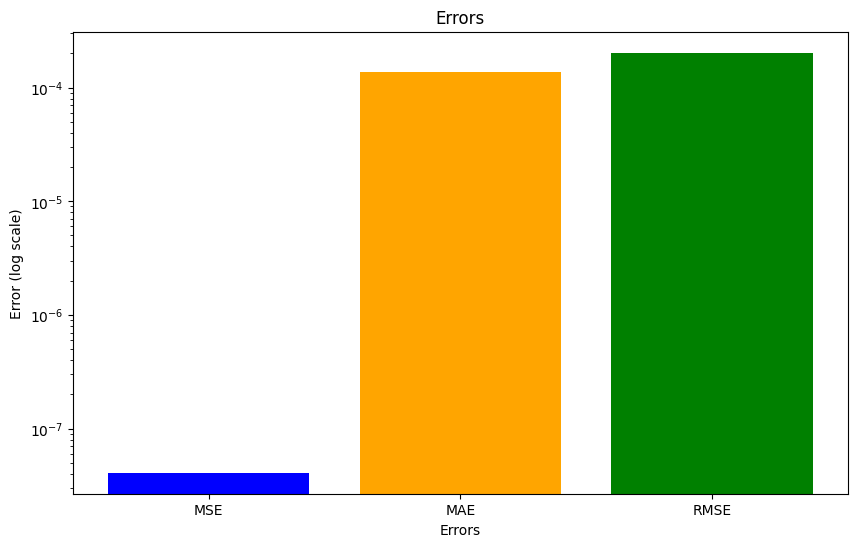

In [171]:
mse_t=mean_squared_error(y_test_T['Energy delta[MWh]'],y_pred_inv_df_t['Energy delta[MWh]']);
mae_t=mean_absolute_error(y_test_T['Energy delta[MWh]'],y_pred_inv_df_t['Energy delta[MWh]']);
rmse_t=root_mean_squared_error(y_test_T['Energy delta[MWh]'],y_pred_inv_df_t['Energy delta[MWh]']);
print(f'MSE:{mse_t}\nMAE:{mae_t}\nRMSE:{rmse_t}')
plt.figure(figsize=(10, 6))
errors={'MSE' : mse_t , 'MAE' : mae_t ,'RMSE' : rmse_t }
plt.bar(errors.keys(),errors.values() , color=['blue', 'orange', 'green']);
plt.xlabel('Errors')
plt.yscale('log')  # Apply log scale to y-axis
plt.ylabel('Error (log scale)')
plt.title('Errors')
plt.show()


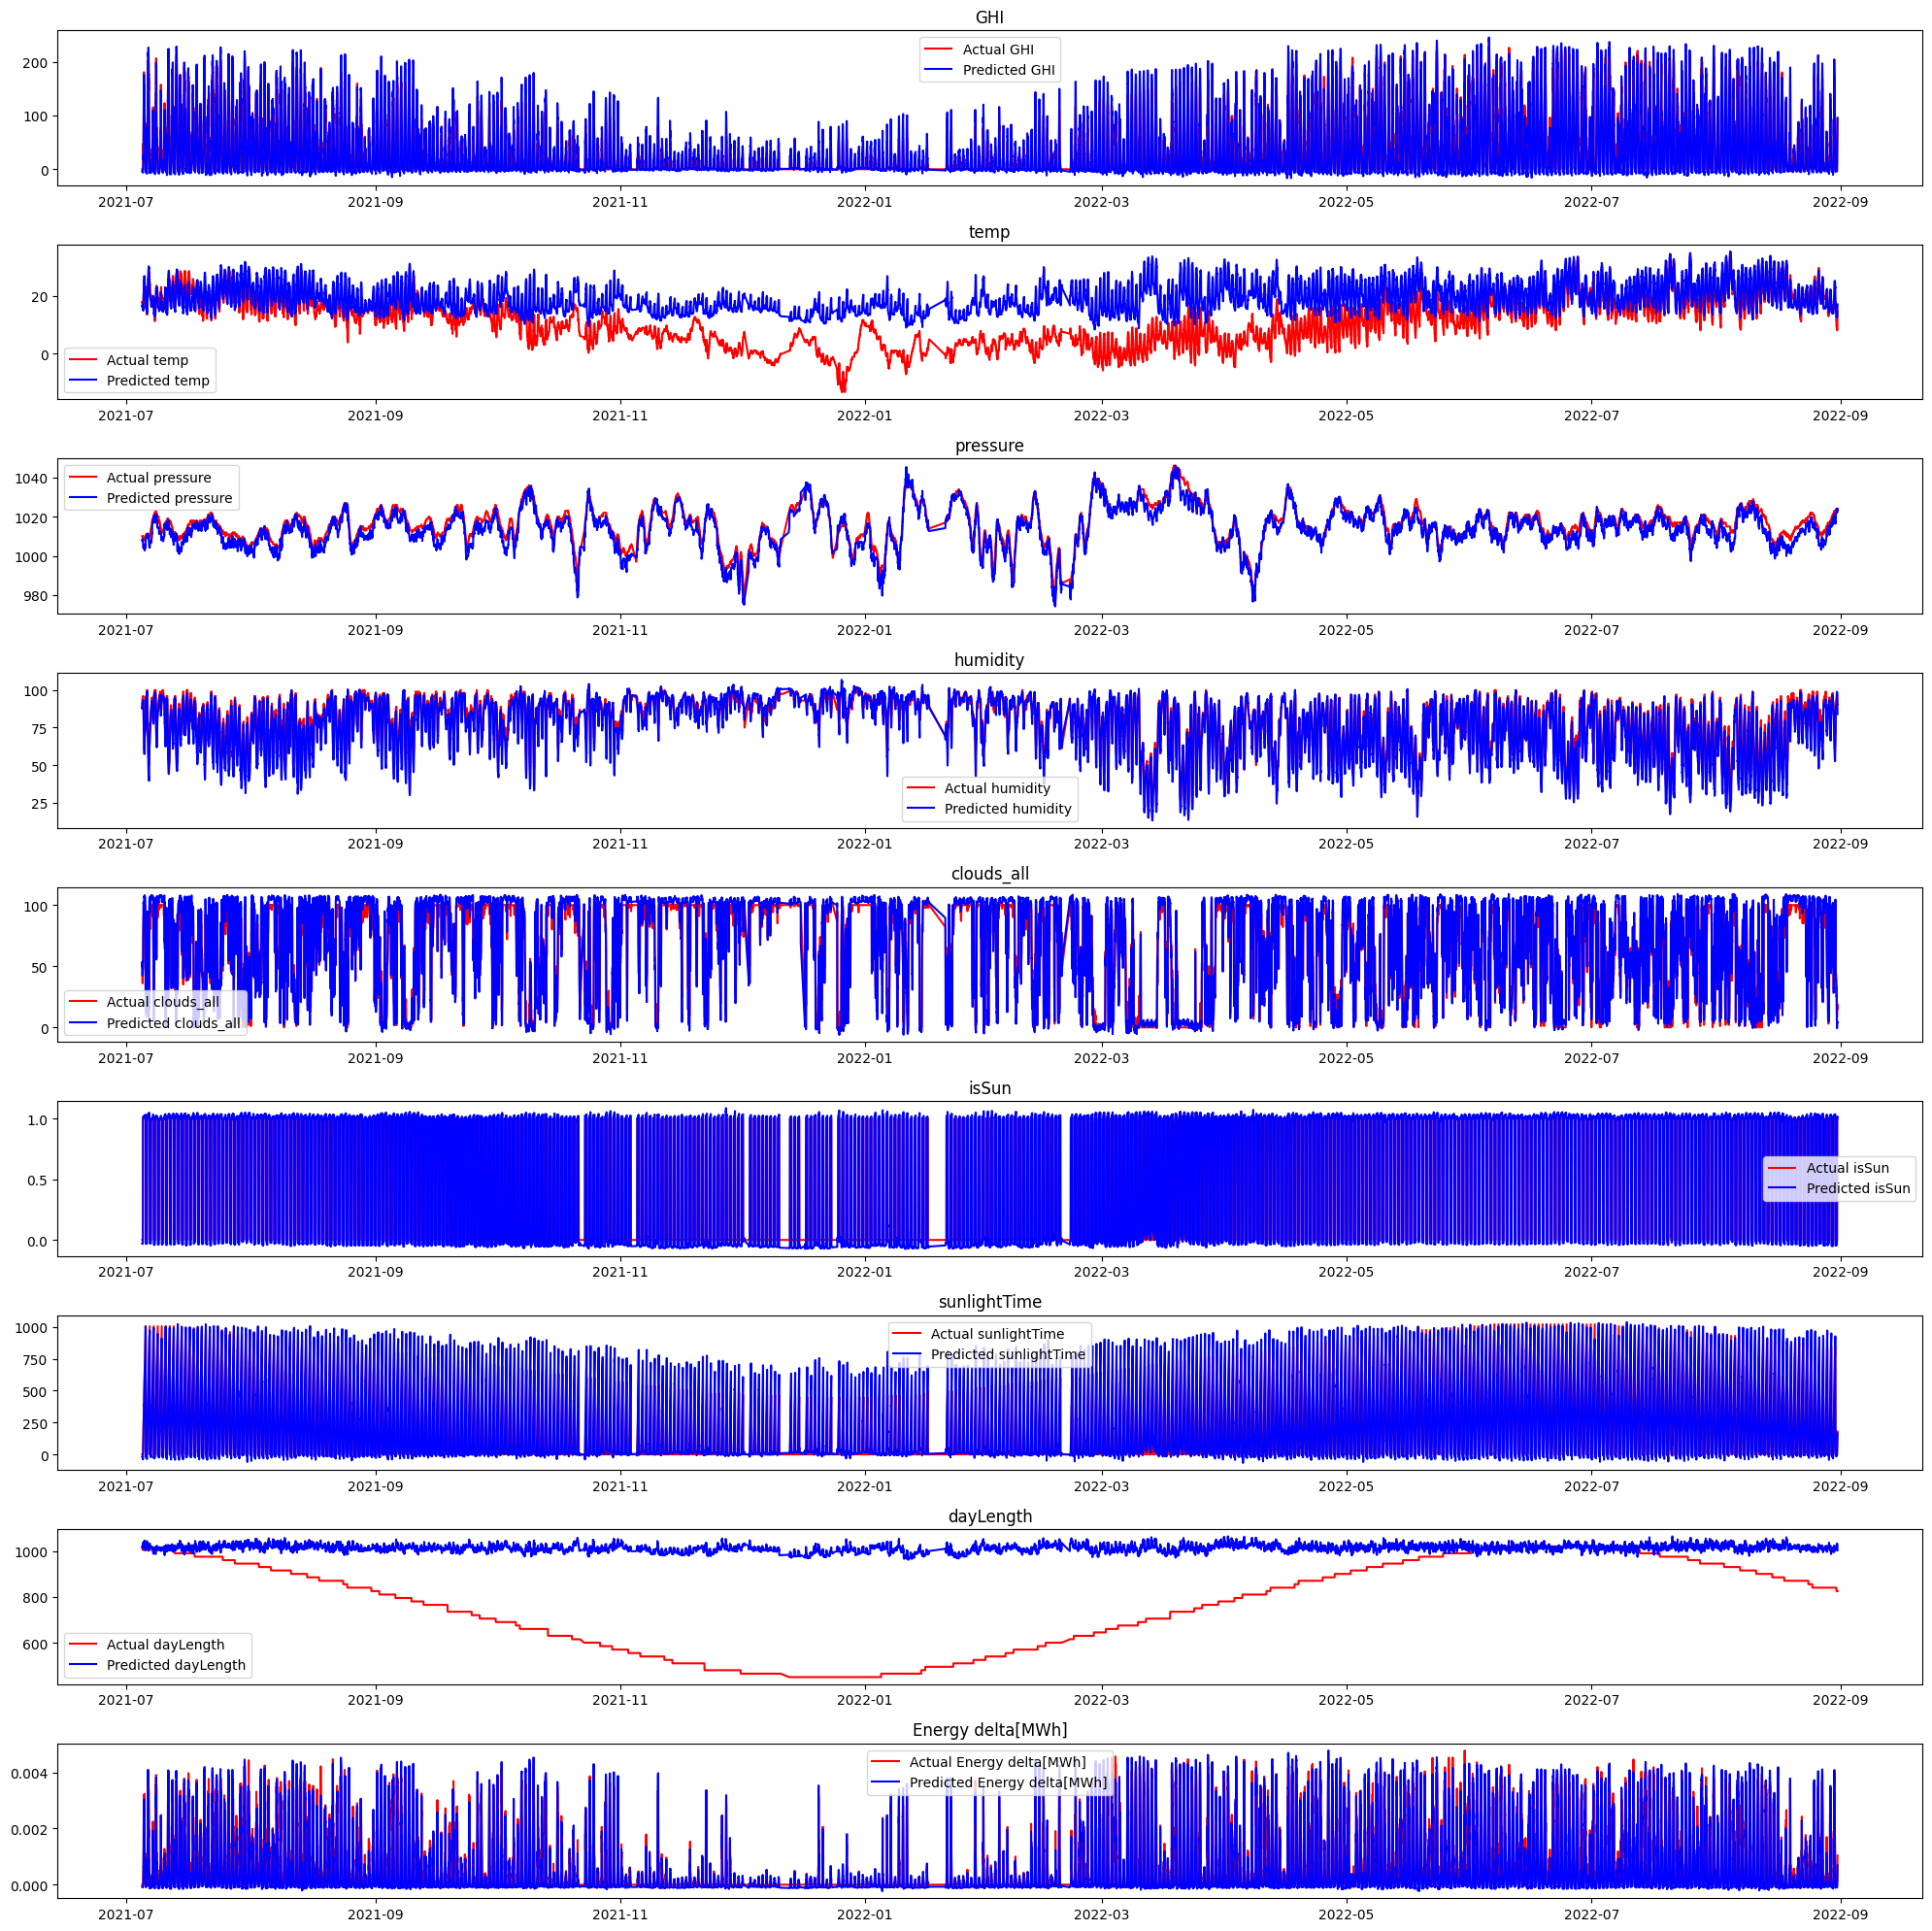

In [172]:
fig ,axes=plt.subplots(len(y_pred_inv_df_t.columns),1,figsize=(20,20))
for ax,col in zip(axes,y_pred_inv_df_t.columns):
    ax.plot(y_test_T[col],color='red',label=f'Actual {col}')
    ax.plot(y_pred_inv_df_t[col],color='blue',label=f'Predicted {col}')
    ax.legend()
    ax.set_title(col)
    ax.set_title(col)

plt.tight_layout()
plt.show()


# ***ERROR COMPARISION***


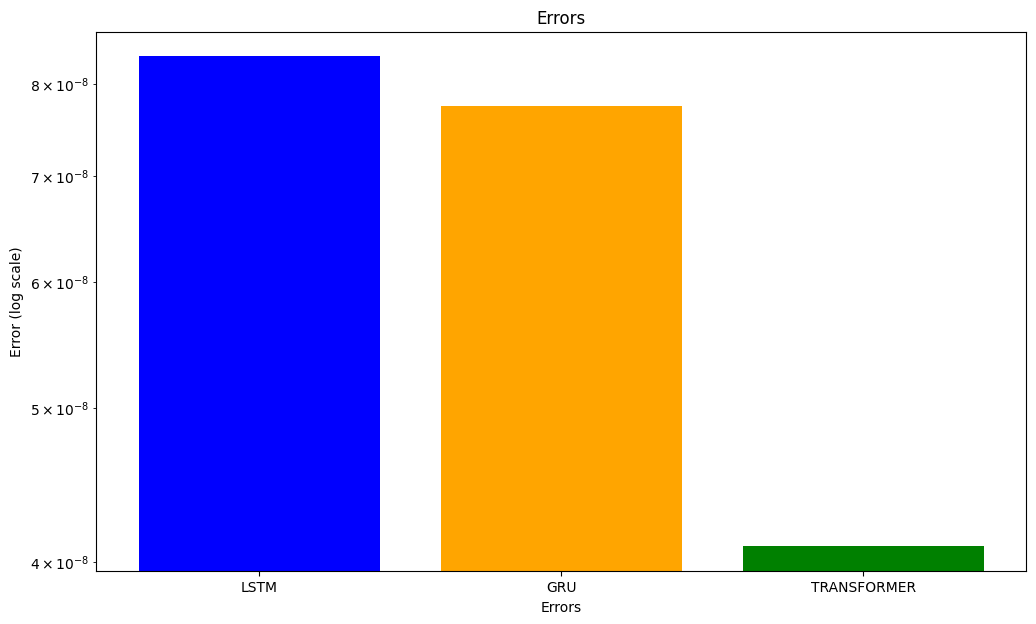

In [173]:
plt.figure(figsize=(12, 7))
error_com_mse={'LSTM':mse_l , 'GRU':mse_g , 'TRANSFORMER':mse_t}
plt.bar(error_com_mse.keys(),error_com_mse.values() , color=['blue', 'orange', 'green']);
plt.xlabel('Errors')
plt.yscale('log')  # Apply log scale to y-axis
plt.ylabel('Error (log scale)')
plt.title('Errors')
plt.show()

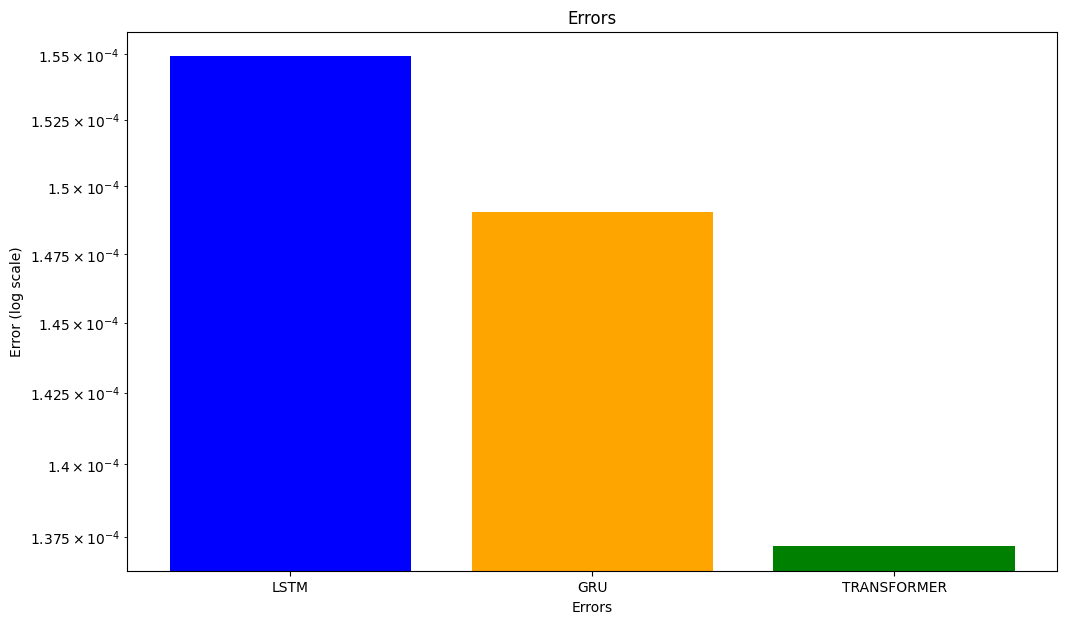

In [174]:
plt.figure(figsize=(12, 7))
error_com_mae={'LSTM':mae_l , 'GRU':mae_g , 'TRANSFORMER':mae_t}
plt.bar(error_com_mae.keys(),error_com_mae.values() , color=['blue', 'orange', 'green']);
plt.xlabel('Errors')
plt.yscale('log')  # Apply log scale to y-axis
plt.ylabel('Error (log scale)')
plt.title('Errors')
plt.show()

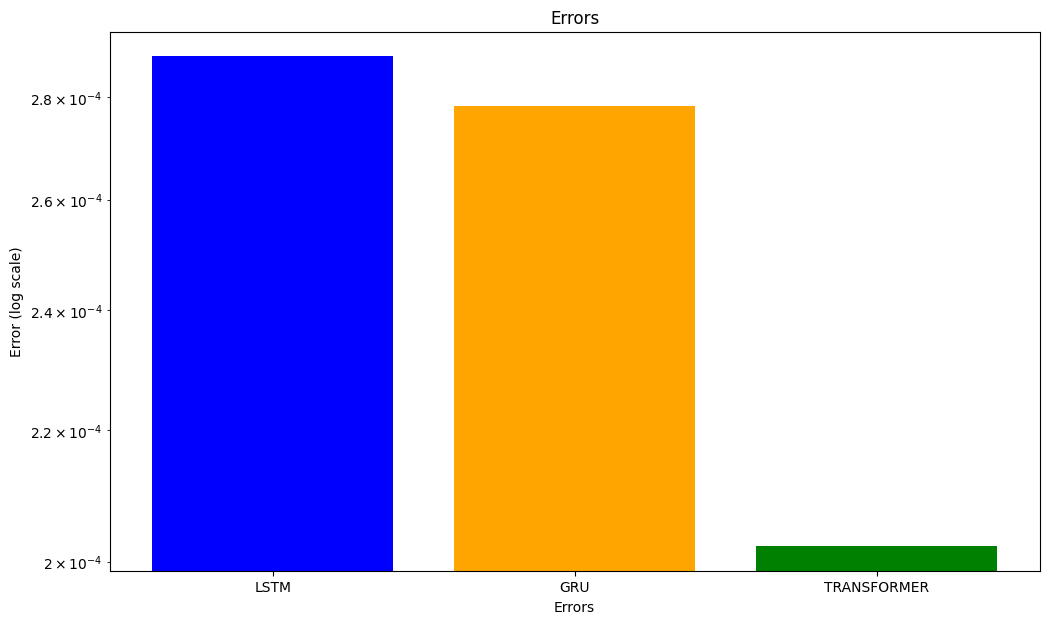

In [175]:
plt.figure(figsize=(12, 7))
error_com_rmse={'LSTM':rmse_l , 'GRU':rmse_g , 'TRANSFORMER':rmse_t}
plt.bar(error_com_rmse.keys(),error_com_rmse.values() , color=['blue', 'orange', 'green']);
plt.xlabel('Errors')
plt.yscale('log')  # Apply log scale to y-axis
plt.ylabel('Error (log scale)')
plt.title('Errors')
plt.show()

# NOW CREATE A DATASET FOR ENSEMBLE ***MODEL***

In [176]:
PredG=y_pred_inv_df_gru
PredL=y_pred_inv_df
PredT=y_pred_inv_df_t


In [177]:
Y=Y.to_frame()
Y

Energy delta[MWh]
Time                                  
2017-01-01 00:00:00           0.000000
2017-01-01 00:15:00           0.000000
2017-01-01 00:30:00           0.000000
2017-01-01 00:45:00           0.000000
2017-01-01 01:00:00           0.000000
...                                ...
2022-08-31 16:45:00           0.000118
2022-08-31 17:00:00           0.000082
2022-08-31 17:15:00           0.000051
2022-08-31 17:30:00           0.000024
2022-08-31 17:45:00           0.000000

[196776 rows x 1 columns]

In [178]:
# Step 1: Convert all variables into DataFrames with column names
y_train_G = pd.DataFrame(PredG['Energy delta[MWh]'])
y_train_L = pd.DataFrame(PredL['Energy delta[MWh]'])
y_train_T = pd.DataFrame(PredT['Energy delta[MWh]'])
y_train_R = pd.DataFrame(Y['Energy delta[MWh]'])

# Step 2: Concatenate the DataFrames along columns
y_train_combined = pd.concat([y_train_G, y_train_L, y_train_T, y_train_R], axis=1)
y_train_combined.columns = ['GRU', 'LSTM', 'Transformer', 'Actual Value']


In [179]:
y_train_combined.dropna(inplace=True)

In [180]:
y_train_combined

GRU      LSTM  Transformer  Actual Value
Time                                                              
2021-07-04 22:00:00  0.000094 -0.000028    -0.000067      0.000000
2021-07-04 22:15:00 -0.000014  0.000006    -0.000067      0.000000
2021-07-04 22:30:00 -0.000017  0.000018    -0.000068      0.000000
2021-07-04 22:45:00  0.000102  0.000013    -0.000069      0.000000
2021-07-04 23:00:00  0.000064  0.000005    -0.000070      0.000000
...                       ...       ...          ...           ...
2022-08-31 05:45:00  0.000251  0.000139     0.000291      0.000162
2022-08-31 06:00:00  0.000267  0.000169     0.000426      0.000181
2022-08-31 06:15:00  0.000358  0.000251     0.000566      0.000377
2022-08-31 06:30:00  0.000596  0.000530     0.000674      0.000634
2022-08-31 06:45:00  0.000907  0.000748     0.000689      0.001040

[39300 rows x 4 columns]

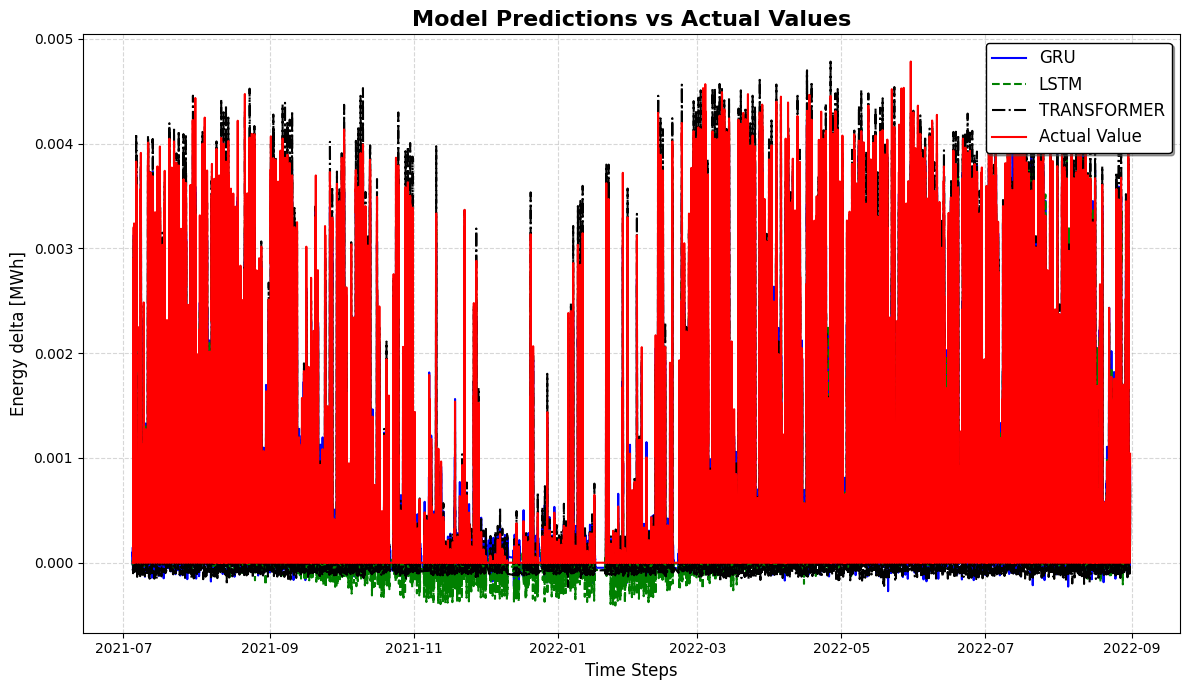

In [226]:
import matplotlib.pyplot as plt

# Create figure
plt.figure(figsize=(12, 7))

# Plot model predictions and actual values
plt.plot(y_train_combined['GRU'], color='blue', linestyle='-', label='GRU')
plt.plot(y_train_combined['LSTM'], color='green', linestyle='--', label='LSTM')
plt.plot(y_train_combined['Transformer'], color='black', linestyle='-.', label='TRANSFORMER')
plt.plot(y_train_combined['Actual Value'], color='red', linestyle='-', label='Actual Value')

# Titles and labels
plt.title("Model Predictions vs Actual Values", fontsize=16, fontweight='bold')
plt.xlabel("Time Steps", fontsize=12)
plt.ylabel("Energy delta [MWh]", fontsize=12)

# Grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Add a legend box
plt.legend(loc='upper right', fontsize=12, frameon=True, edgecolor='black', fancybox=True, shadow=True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


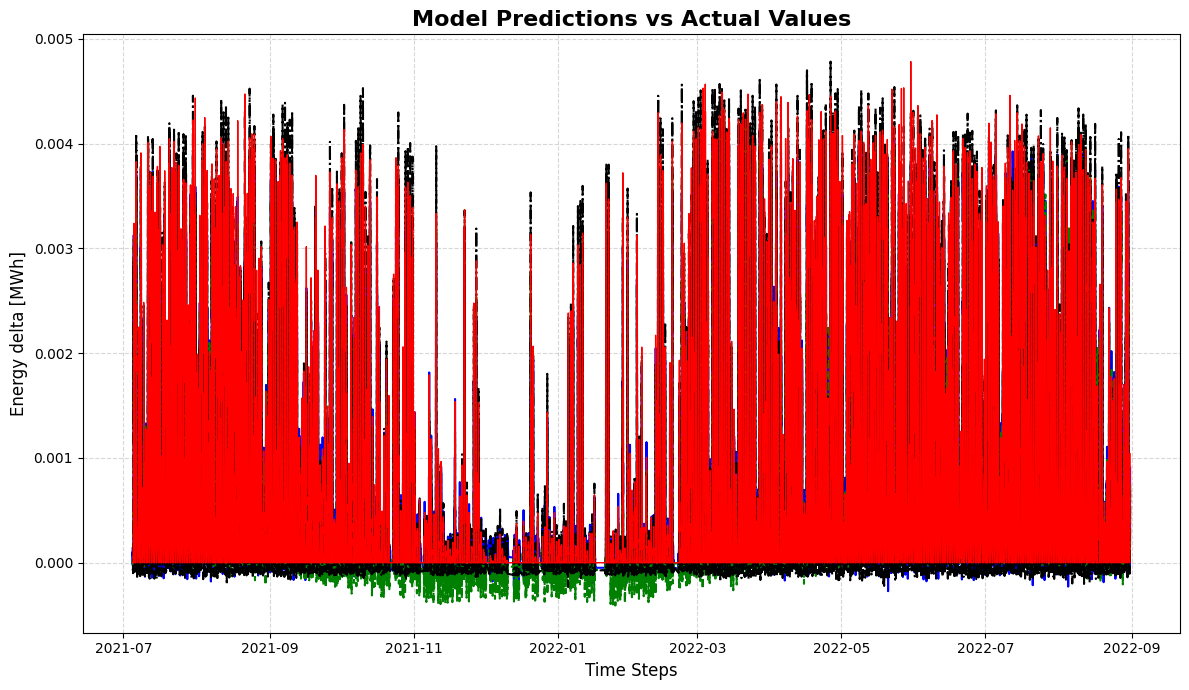

In [182]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))

plt.plot(y_train_combined['GRU'], color='blue', linestyle='-', label='GRU')
plt.plot(y_train_combined['LSTM'], color='green', linestyle='--', label='LSTM')
plt.plot(y_train_combined['Transformer'], color='black', linestyle='-.', label='TRANSFORMER')
plt.plot(y_train_combined['Actual Value'], color='red', linestyle='-', linewidth=1, label='Actual Value')
plt.title("Model Predictions vs Actual Values", fontsize=16, fontweight='bold')
plt.xlabel("Time Steps", fontsize=12)
plt.ylabel("Energy delta [MWh]", fontsize=12)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()



# ***NOW BEGIN WITH  ENSEMBLE MODEL***

In [183]:
X_train, X_test, y_train, y_test = train_test_split(y_train_combined.drop('Actual Value',axis=1),y_train_combined['Actual Value'], test_size = 0.1, random_state=42,shuffle=False)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((35370, 3), (35370,), (3930, 3), (3930,))

In [184]:
X_test

GRU      LSTM  Transformer
Time                                                
2022-07-21 08:30:00  0.003050  0.003057     0.003283
2022-07-21 08:45:00  0.002805  0.002768     0.003450
2022-07-21 09:00:00  0.003059  0.003098     0.003298
2022-07-21 09:15:00  0.003305  0.003316     0.003195
2022-07-21 09:30:00  0.003360  0.003425     0.003476
...                       ...       ...          ...
2022-08-31 05:45:00  0.000251  0.000139     0.000291
2022-08-31 06:00:00  0.000267  0.000169     0.000426
2022-08-31 06:15:00  0.000358  0.000251     0.000566
2022-08-31 06:30:00  0.000596  0.000530     0.000674
2022-08-31 06:45:00  0.000907  0.000748     0.000689

[3930 rows x 3 columns]

# ***MLP***

In [185]:
import torch
import torch.nn as nn
import torch.optim as optim

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the MLP model
class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(3, 100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 1)
        )

    def forward(self, x):
        return self.model(x)




In [186]:
# Training function
def train_model(model, X_train, y_train, epochs=10, batch_size=10, learning_rate=0.001):
    model = model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
     # ✅ Convert to NumPy first if input is DataFrame/Series
    if hasattr(X_train, 'values'):
        X_train = X_train.values
    if hasattr(y_train, 'values'):
        y_train = y_train.values

    # Convert data to tensors and move to device
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)

    for epoch in range(epochs):
        model.train()
        total_loss = 0.0
        total_mae = 0.0

        for i in range(0, len(X_train_tensor), batch_size):
            x_batch = X_train_tensor[i:i+batch_size]
            y_batch = y_train_tensor[i:i+batch_size]

            # Forward pass
            outputs = model(x_batch)

            loss = criterion(outputs, y_batch)

            mae = torch.mean(torch.abs(outputs - y_batch))

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            total_mae += mae.item()

        avg_loss = total_loss / len(X_train_tensor)
        avg_mae = total_mae / len(X_train_tensor)
        print(f"Epoch [{epoch+1}/{epochs}] - Loss: {avg_loss:.8f} - MAE: {avg_mae:.8f}")

    return model

In [187]:
model_mlp = MLPModel()
# trained_model = train_model(model_mlp, X_train, y_train, epochs=50, batch_size=10)

In [188]:
# Save model weights
# torch.save(model_mlp.state_dict(), '/content/drive/MyDrive/XAI /Other data/SAVEDMODEL PV/mlp_model.pt')

In [189]:
model_mlp=MLPModel().to(device)
model_mlp.load_state_dict(torch.load('/content/drive/MyDrive/XAI /Other data/SAVEDMODEL PV/mlp_model.pt'))
model_mlp.eval()

MLPModel(
  (model): Sequential(
    (0): Linear(in_features=3, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [190]:
model_mlp_res=model_mlp(torch.tensor(X_test.values).to(device))


In [191]:
model_mlp_res=model_mlp_res.cpu().detach().numpy()

In [192]:
MLPdf = pd.DataFrame(model_mlp_res, columns=["MLP Output"])

In [193]:
MLPdf.index=X_test.index
MLPdf

MLP Output
Time                           
2022-07-21 08:30:00    0.002998
2022-07-21 08:45:00    0.003057
2022-07-21 09:00:00    0.003014
2022-07-21 09:15:00    0.002992
2022-07-21 09:30:00    0.003206
...                         ...
2022-08-31 05:45:00    0.000297
2022-08-31 06:00:00    0.000396
2022-08-31 06:15:00    0.000513
2022-08-31 06:30:00    0.000644
2022-08-31 06:45:00    0.000710

[3930 rows x 1 columns]

In [194]:
def mean_squared_error(y_true,y_pred):
  return np.mean((y_true-y_pred)**2)

def mean_absolute_error(y_true,y_pred):
  return np.mean(np.abs(y_true-y_pred))

def root_mean_squared_error(y_true,y_pred):
  return np.sqrt(mean_squared_error(y_true,y_pred))


MSE:2.992412422380066e-08
MAE:9.065218488592417e-05
RMSE:0.00017298590758729643


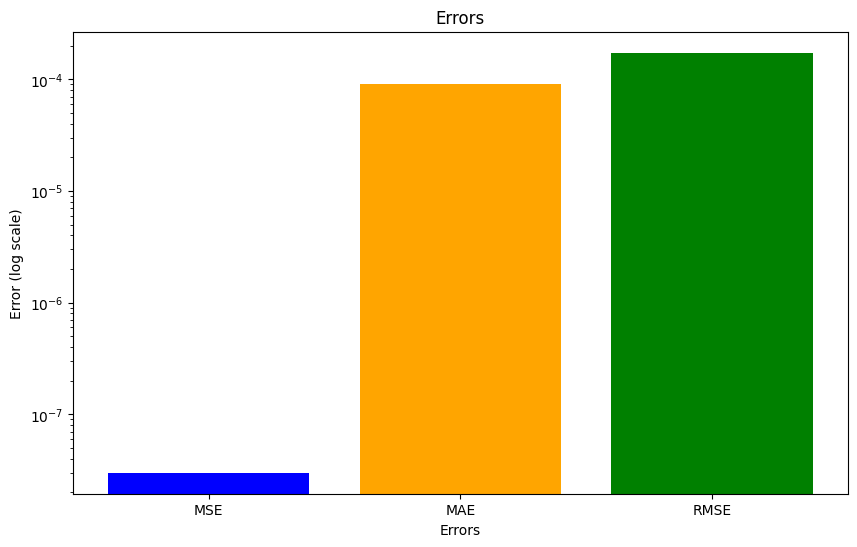

In [195]:
mse_m=mean_squared_error(y_test_T['Energy delta[MWh]'],MLPdf['MLP Output']);
mae_m=mean_absolute_error(y_test_T['Energy delta[MWh]'],MLPdf['MLP Output']);
rmse_m=root_mean_squared_error(y_test_T['Energy delta[MWh]'],MLPdf['MLP Output']);
print(f'MSE:{mse_m}\nMAE:{mae_m}\nRMSE:{rmse_m}')
plt.figure(figsize=(10, 6))
errors={'MSE' : mse_m , 'MAE' : mae_m ,'RMSE' : rmse_m }
plt.bar(errors.keys(),errors.values() , color=['blue', 'orange', 'green']);
plt.xlabel('Errors')
plt.yscale('log')  # Apply log scale to y-axis
plt.ylabel('Error (log scale)')
plt.title('Errors')
plt.show()


# ***CNN MODEL***

In [196]:
import torch
import torch.nn as nn

In [197]:
class CNN_model(nn.Module):
  def __init__(self):
    super(CNN_model,self).__init__()
    self.conv1=nn.Conv1d(out_channels=128,kernel_size=2,in_channels=1)
    self.pool=nn.MaxPool1d(kernel_size=2)
    self.flatten=nn.Flatten()
    self.fc1=nn.Linear(in_features=128,out_features=64)
    self.fc2=nn.Linear(in_features=64,out_features=1)

  def forward(self,x):
    x=self.conv1(x)
    x=self.pool(x)
    x=self.flatten(x)
    x=self.fc1(x)
    x=self.fc2(x)
    return x


In [198]:
def train_cnn_model(model, X_train, y_train, epochs=10, batch_size=1, learning_rate=0.001):
    model = model.to(device)
    loss_fn = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Ensure data is NumPy array first
    if hasattr(X_train, 'values'):
        X_train = X_train.values
    if hasattr(y_train, 'values'):
        y_train = y_train.values

    # Convert to torch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).view(-1, 1, 3).to(device)  # (batch_size, 1, 3)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)     # (batch_size, 1)

    history = {'loss': [], 'mae': []}

    for epoch in range(epochs):
        model.train()
        total_loss = 0.0
        total_mae = 0.0

        for i in range(0, len(X_train_tensor), batch_size):
            x_batch = X_train_tensor[i:i+batch_size]
            y_batch = y_train_tensor[i:i+batch_size]

            optimizer.zero_grad()
            outputs = model(x_batch)

            loss = loss_fn(outputs, y_batch)
            mae = torch.mean(torch.abs(outputs - y_batch))

            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            total_mae += mae.item()

        avg_loss = total_loss / len(X_train_tensor)
        avg_mae = total_mae / len(X_train_tensor)

        history['loss'].append(avg_loss)
        history['mae'].append(avg_mae)

        print(f"Epoch [{epoch+1}/{epochs}] - Loss: {avg_loss:.8f} - MAE: {avg_mae:.8f}")

    return model, history


In [199]:
model_cnn = CNN_model().to(device)
# trained_model_cnn, history = train_cnn_model(model_cnn, X_train, y_train, epochs=80, batch_size=10)


In [200]:
# Save model weights
# torch.save(model_cnn.state_dict(), '/content/drive/MyDrive/XAI /Other data/SAVEDMODEL PV/cnn_model.pt')

In [201]:
model_cnn=CNN_model().to(device)
model_cnn.load_state_dict(torch.load('/content/drive/MyDrive/XAI /Other data/SAVEDMODEL PV/cnn_model.pt'))
model_cnn.eval()

CNN_model(
  (conv1): Conv1d(1, 128, kernel_size=(2,), stride=(1,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=128, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
)

In [202]:
X_train

GRU      LSTM  Transformer
Time                                                
2021-07-04 22:00:00  0.000094 -0.000028    -0.000067
2021-07-04 22:15:00 -0.000014  0.000006    -0.000067
2021-07-04 22:30:00 -0.000017  0.000018    -0.000068
2021-07-04 22:45:00  0.000102  0.000013    -0.000069
2021-07-04 23:00:00  0.000064  0.000005    -0.000070
...                       ...       ...          ...
2022-07-21 07:15:00  0.001868  0.001918     0.001875
2022-07-21 07:30:00  0.002149  0.002192     0.002072
2022-07-21 07:45:00  0.002367  0.002365     0.002331
2022-07-21 08:00:00  0.002625  0.002642     0.002690
2022-07-21 08:15:00  0.002895  0.002869     0.003021

[35370 rows x 3 columns]

In [203]:
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).view(-1, 1, 3).to(device)  # (batch_size, 1, 3)
model_cnn_res=model_cnn(X_test_tensor).cpu().detach().numpy()


In [204]:
model_cnn_ = model_cnn_res.reshape(-1, 1)
CNNdf = pd.DataFrame(model_cnn_, columns=["CNN Output"])


In [205]:
CNNdf.index=X_test.index
CNNdf

CNN Output
Time                           
2022-07-21 08:30:00    0.003247
2022-07-21 08:45:00    0.003310
2022-07-21 09:00:00    0.003269
2022-07-21 09:15:00    0.003334
2022-07-21 09:30:00    0.003494
...                         ...
2022-08-31 05:45:00    0.000113
2022-08-31 06:00:00    0.000229
2022-08-31 06:15:00    0.000363
2022-08-31 06:30:00    0.000518
2022-08-31 06:45:00    0.000668

[3930 rows x 1 columns]

In [206]:
def mean_squared_error(y_true,y_pred):
  return np.mean((y_true-y_pred)**2)

def mean_absolute_error(y_true,y_pred):
  return np.mean(np.abs(y_true-y_pred))

def root_mean_squared_error(y_true,y_pred):
  return np.sqrt(mean_squared_error(y_true,y_pred))


MSE:7.665244590425429e-08
MAE:0.00019026515970433145
RMSE:0.0002768617812271211


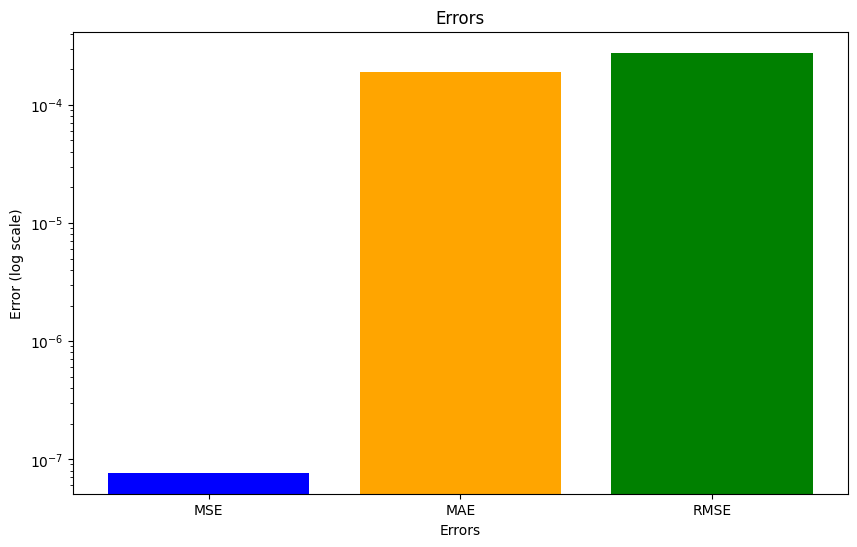

In [207]:
mse_c=mean_squared_error(y_test_T['Energy delta[MWh]'],CNNdf['CNN Output']);
mae_c=mean_absolute_error(y_test_T['Energy delta[MWh]'],CNNdf['CNN Output']);
rmse_c=root_mean_squared_error(y_test_T['Energy delta[MWh]'],CNNdf['CNN Output']);
print(f'MSE:{mse_c}\nMAE:{mae_c}\nRMSE:{rmse_c}')
plt.figure(figsize=(10, 6))
errors={'MSE' : mse_c , 'MAE' : mae_c ,'RMSE' : rmse_c }
plt.bar(errors.keys(),errors.values() , color=['blue', 'orange', 'green']);
plt.xlabel('Errors')
plt.yscale('log')  # Apply log scale to y-axis
plt.ylabel('Error (log scale)')
plt.title('Errors')
plt.show()


# ***SIMPLE MEAN***

In [208]:
X_test['Simple Mean'] = X_test.mean(axis=1)


In [209]:
SimpleMean=X_test['Simple Mean']
SimpleMean

Time
2022-07-21 08:30:00    0.003130
2022-07-21 08:45:00    0.003007
2022-07-21 09:00:00    0.003151
2022-07-21 09:15:00    0.003272
2022-07-21 09:30:00    0.003420
                         ...   
2022-08-31 05:45:00    0.000227
2022-08-31 06:00:00    0.000287
2022-08-31 06:15:00    0.000392
2022-08-31 06:30:00    0.000600
2022-08-31 06:45:00    0.000782
Name: Simple Mean, Length: 3930, dtype: float32

In [210]:
def mean_squared_error(y_true,y_pred):
  return np.mean((y_true-y_pred)**2)

def mean_absolute_error(y_true,y_pred):
  return np.mean(np.abs(y_true-y_pred))

def root_mean_squared_error(y_true,y_pred):
  return np.sqrt(mean_squared_error(y_true,y_pred))


MSE:5.4697165938341855e-08
MAE:0.00011657859030857305
RMSE:0.00023387425240573587


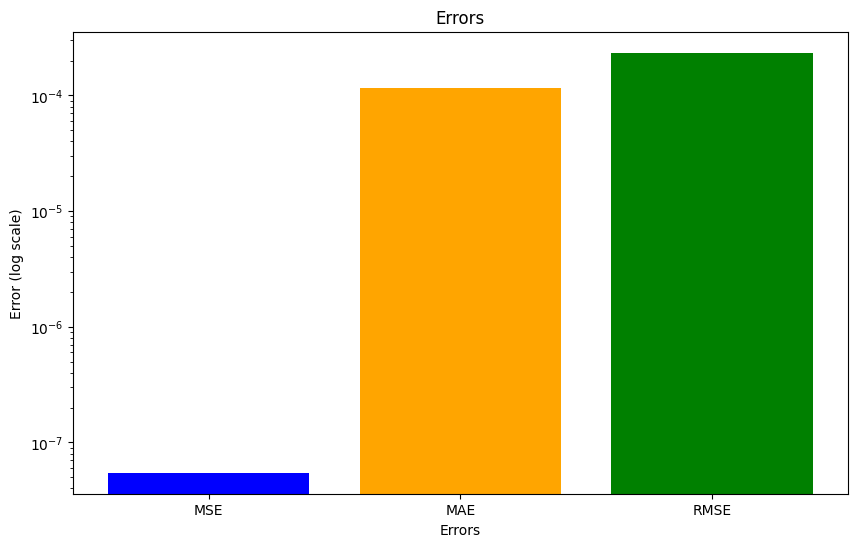

In [211]:
mse_s=mean_squared_error(y_test_T['Energy delta[MWh]'],X_test['Simple Mean']);
mae_s=mean_absolute_error(y_test_T['Energy delta[MWh]'],X_test['Simple Mean']);
rmse_s=root_mean_squared_error(y_test_T['Energy delta[MWh]'],X_test['Simple Mean']);
print(f'MSE:{mse_s}\nMAE:{mae_s}\nRMSE:{rmse_s}')
plt.figure(figsize=(10, 6))
errors={'MSE' : mse_s , 'MAE' : mae_s ,'RMSE' : rmse_s }
plt.bar(errors.keys(),errors.values() , color=['blue', 'orange', 'green']);
plt.xlabel('Errors')
plt.yscale('log')  # Apply log scale to y-axis
plt.ylabel('Error (log scale)')
plt.title('Errors')
plt.show()


# ***ERROR COMPARISION***

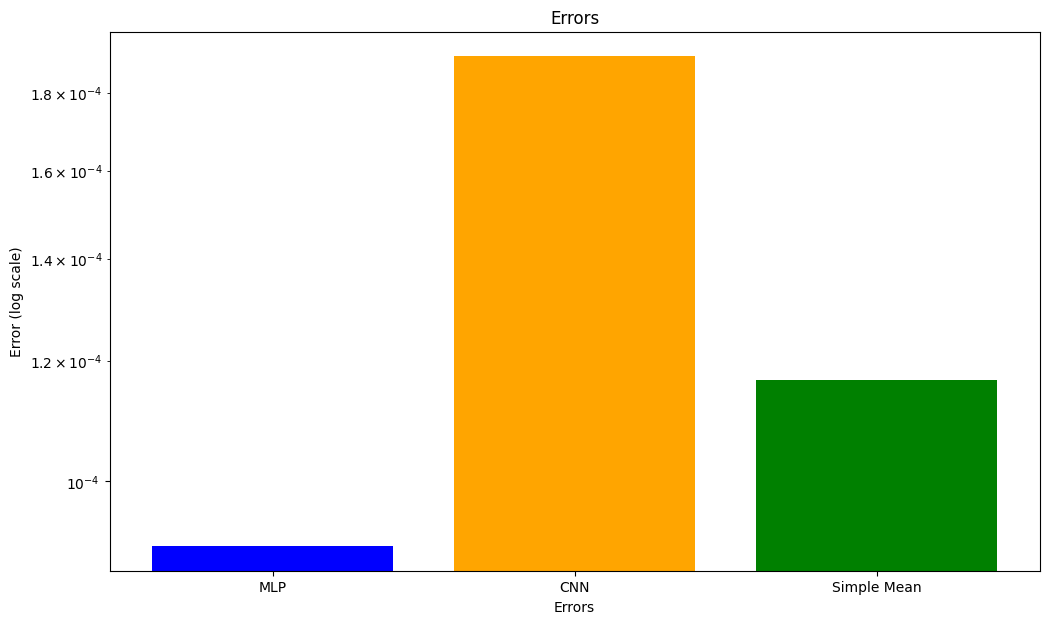

In [212]:
plt.figure(figsize=(12, 7))

error_com_mae={'MLP':mae_m , 'CNN':mae_c , 'Simple Mean':mae_s}
plt.bar(error_com_mae.keys(),error_com_mae.values() , color=['blue', 'orange', 'green']);
plt.xlabel('Errors')
plt.yscale('log')  # Apply log scale to y-axis
plt.ylabel('Error (log scale)')
plt.title('Errors')
plt.show()

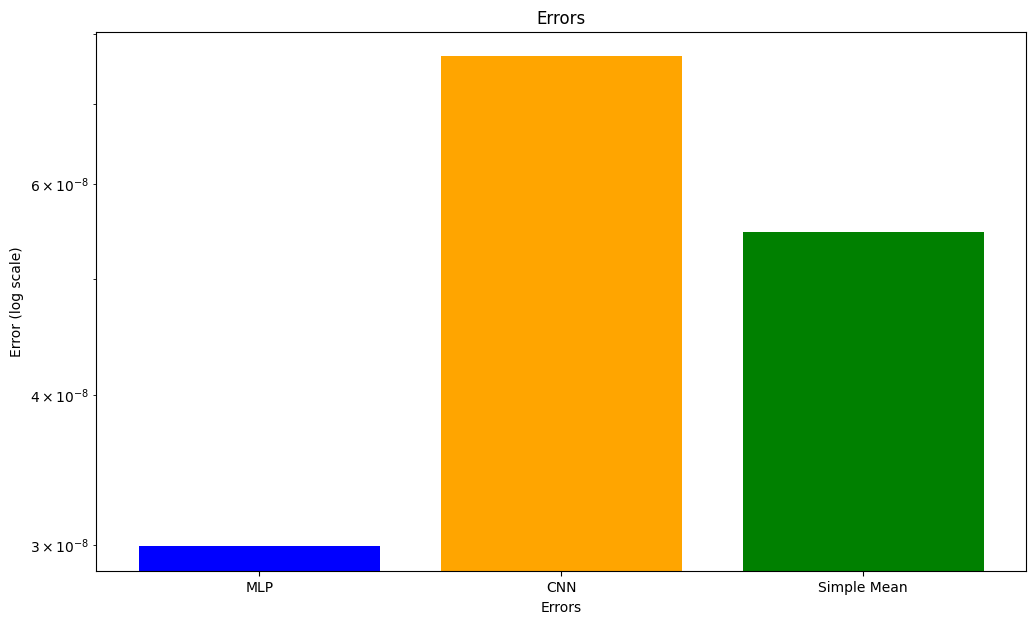

In [213]:
plt.figure(figsize=(12, 7))
error_com_mse={'MLP':mse_m , 'CNN':mse_c , 'Simple Mean':mse_s}
plt.bar(error_com_mse.keys(),error_com_mse.values() , color=['blue', 'orange', 'green']);
plt.xlabel('Errors')
plt.yscale('log')  # Apply log scale to y-axis
plt.ylabel('Error (log scale)')
plt.title('Errors')
plt.show()

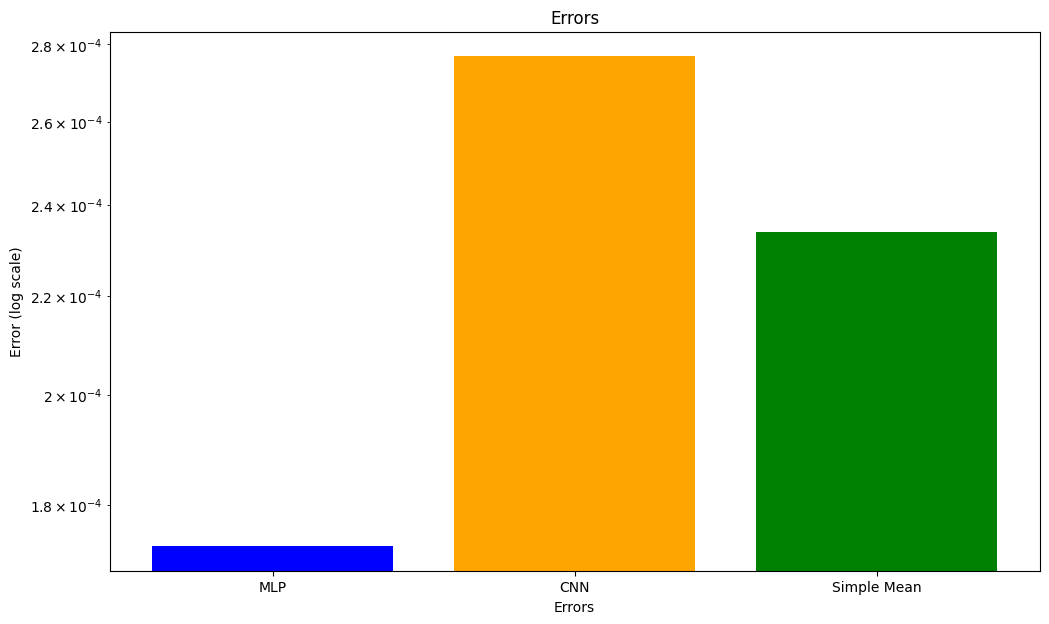

In [214]:
plt.figure(figsize=(12, 7))
error_com_rmse={'MLP':rmse_m , 'CNN':rmse_c , 'Simple Mean':rmse_s}
plt.bar(error_com_rmse.keys(),error_com_rmse.values() , color=['blue', 'orange', 'green']);
plt.xlabel('Errors')
plt.yscale('log')  # Apply log scale to y-axis
plt.ylabel('Error (log scale)')
plt.title('Errors')
plt.show()

In [215]:
ActualData=y_test
ActualData=pd.DataFrame(ActualData)
ActualData.index=X_test.index
ActualData.columns=['Actual Value']
ActualData

Actual Value
Time                             
2022-07-21 08:30:00      0.003048
2022-07-21 08:45:00      0.003309
2022-07-21 09:00:00      0.003253
2022-07-21 09:15:00      0.002655
2022-07-21 09:30:00      0.002923
...                           ...
2022-08-31 05:45:00      0.000162
2022-08-31 06:00:00      0.000181
2022-08-31 06:15:00      0.000377
2022-08-31 06:30:00      0.000634
2022-08-31 06:45:00      0.001040

[3930 rows x 1 columns]

In [216]:
FinalDataframe=pd.concat([SimpleMean,MLPdf,CNNdf,ActualData],axis=1)
FinalDataframe

Simple Mean  MLP Output  CNN Output  Actual Value
Time                                                                  
2022-07-21 08:30:00     0.003130    0.002998    0.003247      0.003048
2022-07-21 08:45:00     0.003007    0.003057    0.003310      0.003309
2022-07-21 09:00:00     0.003151    0.003014    0.003269      0.003253
2022-07-21 09:15:00     0.003272    0.002992    0.003334      0.002655
2022-07-21 09:30:00     0.003420    0.003206    0.003494      0.002923
...                          ...         ...         ...           ...
2022-08-31 05:45:00     0.000227    0.000297    0.000113      0.000162
2022-08-31 06:00:00     0.000287    0.000396    0.000229      0.000181
2022-08-31 06:15:00     0.000392    0.000513    0.000363      0.000377
2022-08-31 06:30:00     0.000600    0.000644    0.000518      0.000634
2022-08-31 06:45:00     0.000782    0.000710    0.000668      0.001040

[3930 rows x 4 columns]

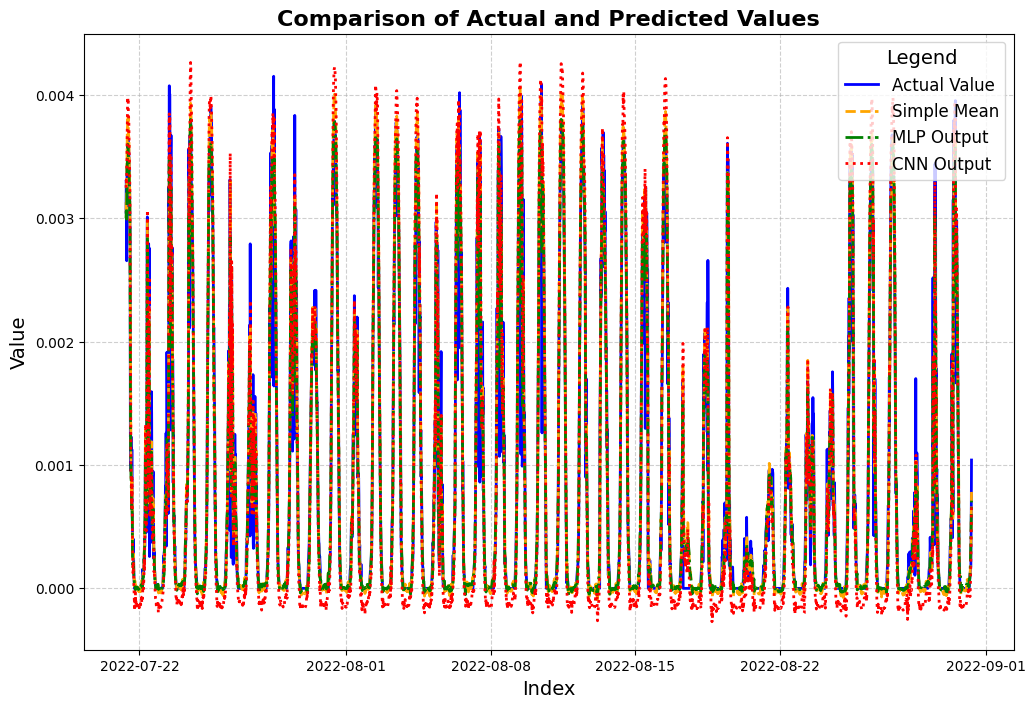

In [217]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot each line with custom styles
plt.plot(FinalDataframe['Actual Value'], label='Actual Value', color='blue', linestyle='-', linewidth=2)
plt.plot(FinalDataframe['Simple Mean'], label='Simple Mean', color='orange', linestyle='--', linewidth=2)
plt.plot(FinalDataframe['MLP Output'], label='MLP Output', color='green', linestyle='-.', linewidth=2)
plt.plot(FinalDataframe['CNN Output'], label='CNN Output', color='red', linestyle=':', linewidth=2)

# Add title and labels
plt.title('Comparison of Actual and Predicted Values', fontsize=16, fontweight='bold')
plt.xlabel('Index', fontsize=14)
plt.ylabel('Value', fontsize=14)

# Customize legend
plt.legend(loc='best', fontsize=12, title='Legend', title_fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


In [218]:
ensemble_model_test=pd.concat([FinalDataframe,X_test],axis=1)
ensemble_model_test

Simple Mean  MLP Output  CNN Output  Actual Value  \
Time                                                                     
2022-07-21 08:30:00     0.003130    0.002998    0.003247      0.003048   
2022-07-21 08:45:00     0.003007    0.003057    0.003310      0.003309   
2022-07-21 09:00:00     0.003151    0.003014    0.003269      0.003253   
2022-07-21 09:15:00     0.003272    0.002992    0.003334      0.002655   
2022-07-21 09:30:00     0.003420    0.003206    0.003494      0.002923   
...                          ...         ...         ...           ...   
2022-08-31 05:45:00     0.000227    0.000297    0.000113      0.000162   
2022-08-31 06:00:00     0.000287    0.000396    0.000229      0.000181   
2022-08-31 06:15:00     0.000392    0.000513    0.000363      0.000377   
2022-08-31 06:30:00     0.000600    0.000644    0.000518      0.000634   
2022-08-31 06:45:00     0.000782    0.000710    0.000668      0.001040   

                          GRU      LSTM  Transformer  Simple Mean  
Time                                                               
2022-07-21 08:30:00  0.003050  0.003057     0.003283     0.003130  
2022-07-21 08:45:00  0.002805  0.002768     0.003450     0.003007  
2022-07-21 09:00:00  0.003059  0.003098     0.003298     0.003151  
2022-07-21 09:15:00  0.003305  0.003316     0.003195     0.003272  
2022-07-21 09:30:00  0.003360  0.003425     0.003476     0.003420  
...                       ...       ...          ...          ...  
2022-08-31 05:45:00  0.000251  0.000139     0.000291     0.000227  
2022-08-31 06:00:00  0.000267  0.000169     0.000426     0.000287  
2022-08-31 06:15:00  0.000358  0.000251     0.000566     0.000392  
2022-08-31 06:30:00  0.000596  0.000530     0.000674     0.000600  
2022-08-31 06:45:00  0.000907  0.000748     0.000689     0.000782  

[3930 rows x 8 columns]

In [219]:
y_train_combined

GRU      LSTM  Transformer  Actual Value
Time                                                              
2021-07-04 22:00:00  0.000094 -0.000028    -0.000067      0.000000
2021-07-04 22:15:00 -0.000014  0.000006    -0.000067      0.000000
2021-07-04 22:30:00 -0.000017  0.000018    -0.000068      0.000000
2021-07-04 22:45:00  0.000102  0.000013    -0.000069      0.000000
2021-07-04 23:00:00  0.000064  0.000005    -0.000070      0.000000
...                       ...       ...          ...           ...
2022-08-31 05:45:00  0.000251  0.000139     0.000291      0.000162
2022-08-31 06:00:00  0.000267  0.000169     0.000426      0.000181
2022-08-31 06:15:00  0.000358  0.000251     0.000566      0.000377
2022-08-31 06:30:00  0.000596  0.000530     0.000674      0.000634
2022-08-31 06:45:00  0.000907  0.000748     0.000689      0.001040

[39300 rows x 4 columns]

In [220]:
monthly_data_combined = y_train_combined


In [221]:
monthly_data_combined

GRU      LSTM  Transformer  Actual Value
Time                                                              
2021-07-04 22:00:00  0.000094 -0.000028    -0.000067      0.000000
2021-07-04 22:15:00 -0.000014  0.000006    -0.000067      0.000000
2021-07-04 22:30:00 -0.000017  0.000018    -0.000068      0.000000
2021-07-04 22:45:00  0.000102  0.000013    -0.000069      0.000000
2021-07-04 23:00:00  0.000064  0.000005    -0.000070      0.000000
...                       ...       ...          ...           ...
2022-08-31 05:45:00  0.000251  0.000139     0.000291      0.000162
2022-08-31 06:00:00  0.000267  0.000169     0.000426      0.000181
2022-08-31 06:15:00  0.000358  0.000251     0.000566      0.000377
2022-08-31 06:30:00  0.000596  0.000530     0.000674      0.000634
2022-08-31 06:45:00  0.000907  0.000748     0.000689      0.001040

[39300 rows x 4 columns]

In [222]:
monthly_data_ensemble = ensemble_model_test.resample('D').mean()
monthly_data_ensemble

Simple Mean  MLP Output  CNN Output  Actual Value       GRU  \
Time                                                                      
2022-07-21     0.001316    0.001216    0.001300      0.001266  0.001369   
2022-07-22     0.000507    0.000471    0.000444      0.000501  0.000574   
2022-07-23     0.000812    0.000786    0.000786      0.000798  0.000847   
2022-07-24     0.001013    0.000962    0.000984      0.000938  0.001045   
2022-07-25     0.001165    0.001106    0.001121      0.001135  0.001173   
2022-07-26     0.000610    0.000581    0.000560      0.000573  0.000657   
2022-07-27     0.000576    0.000531    0.000503      0.000528  0.000644   
2022-07-28     0.001153    0.001117    0.001137      0.001086  0.001173   
2022-07-29     0.000892    0.000848    0.000834      0.000842  0.000931   
2022-07-30     0.000752    0.000715    0.000669      0.000749  0.000792   
2022-07-31     0.001211    0.001160    0.001181      0.001143  0.001219   
2022-08-01     0.000541    0.000505    0.000460      0.000516  0.000594   
2022-08-02     0.001191    0.001141    0.001155      0.001144  0.001209   
2022-08-03     0.001160    0.001097    0.001121      0.001129  0.001190   
2022-08-04     0.001084    0.001018    0.001033      0.001010  0.001112   
2022-08-05     0.000598    0.000560    0.000529      0.000592  0.000645   
2022-08-06     0.001119    0.001074    0.001108      0.001061  0.001155   
2022-08-07     0.000928    0.000860    0.000907      0.000809  0.000990   
2022-08-08     0.000929    0.000872    0.000903      0.000888  0.000983   
2022-08-09     0.001074    0.001015    0.001063      0.001016  0.001122   
2022-08-10     0.001158    0.001086    0.001122      0.001067  0.001202   
2022-08-11     0.001171    0.001108    0.001134      0.001093  0.001209   
2022-08-12     0.001134    0.001075    0.001091      0.001103  0.001161   
2022-08-13     0.000937    0.000926    0.000891      0.000981  0.000951   
2022-08-14     0.001079    0.001041    0.001053      0.001057  0.001093   
2022-08-15     0.000937    0.000902    0.000892      0.000852  0.000957   
2022-08-16     0.001125    0.001083    0.001098      0.001068  0.001143   
2022-08-17     0.000221    0.000202    0.000113      0.000088  0.000291   
2022-08-18     0.000479    0.000455    0.000391      0.000470  0.000528   
2022-08-19     0.000385    0.000388    0.000304      0.000402  0.000427   
2022-08-20     0.000082    0.000098   -0.000061      0.000100  0.000146   
2022-08-21     0.000288    0.000292    0.000160      0.000310  0.000351   
2022-08-22     0.000413    0.000402    0.000303      0.000403  0.000472   
2022-08-23     0.000453    0.000435    0.000358      0.000441  0.000511   
2022-08-24     0.000414    0.000402    0.000309      0.000405  0.000475   
2022-08-25     0.000846    0.000824    0.000788      0.000849  0.000875   
2022-08-26     0.000933    0.000909    0.000882      0.000890  0.000966   
2022-08-27     0.000981    0.000993    0.000980      0.001002  0.000971   
2022-08-28     0.000172    0.000183    0.000044      0.000207  0.000235   
2022-08-29     0.000391    0.000401    0.000316      0.000429  0.000436   
2022-08-30     0.000838    0.000843    0.000815      0.000840  0.000849   
2022-08-31     0.000127    0.000139    0.000023      0.000104  0.000160   

                LSTM  Transformer  Simple Mean  
Time                                            
2022-07-21  0.001322     0.001258     0.001316  
2022-07-22  0.000514     0.000433     0.000507  
2022-07-23  0.000791     0.000799     0.000812  
2022-07-24  0.001001     0.000995     0.001013  
2022-07-25  0.001166     0.001155     0.001165  
2022-07-26  0.000613     0.000561     0.000610  
2022-07-27  0.000587     0.000497     0.000576  
2022-07-28  0.001110     0.001176     0.001153  
2022-07-29  0.000886     0.000860     0.000892  
2022-07-30  0.000753     0.000711     0.000752  
2022-07-31  0.001185     0.001228     0.001211  
2022-08-01  0.000558     0.000471     0.000541  
2022-08-02  0.001163     

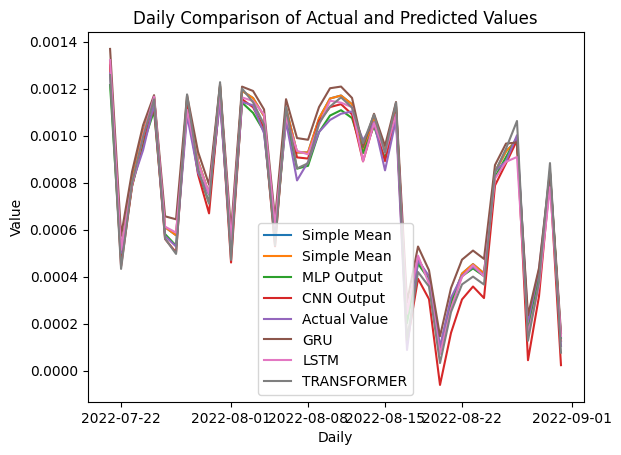

In [223]:
plt.plot(monthly_data_ensemble.index, monthly_data_ensemble['Simple Mean'], label='Simple Mean')
plt.plot(monthly_data_ensemble.index, monthly_data_ensemble['MLP Output'], label='MLP Output')
plt.plot(monthly_data_ensemble.index, monthly_data_ensemble['CNN Output'], label='CNN Output')
plt.plot(monthly_data_ensemble.index, monthly_data_ensemble['Actual Value'], label='Actual Value')
plt.plot(monthly_data_ensemble.index, monthly_data_ensemble['GRU'], label='GRU')
plt.plot(monthly_data_ensemble.index, monthly_data_ensemble['LSTM'], label='LSTM')
plt.plot(monthly_data_ensemble.index, monthly_data_ensemble['Transformer'], label='TRANSFORMER')
plt.title('Daily Comparison of Actual and Predicted Values')
plt.xlabel('Daily')
plt.ylabel('Value')
plt.legend()
plt.show()

***PREDICTED OUTPUT FROM RESEARCH PAPER***

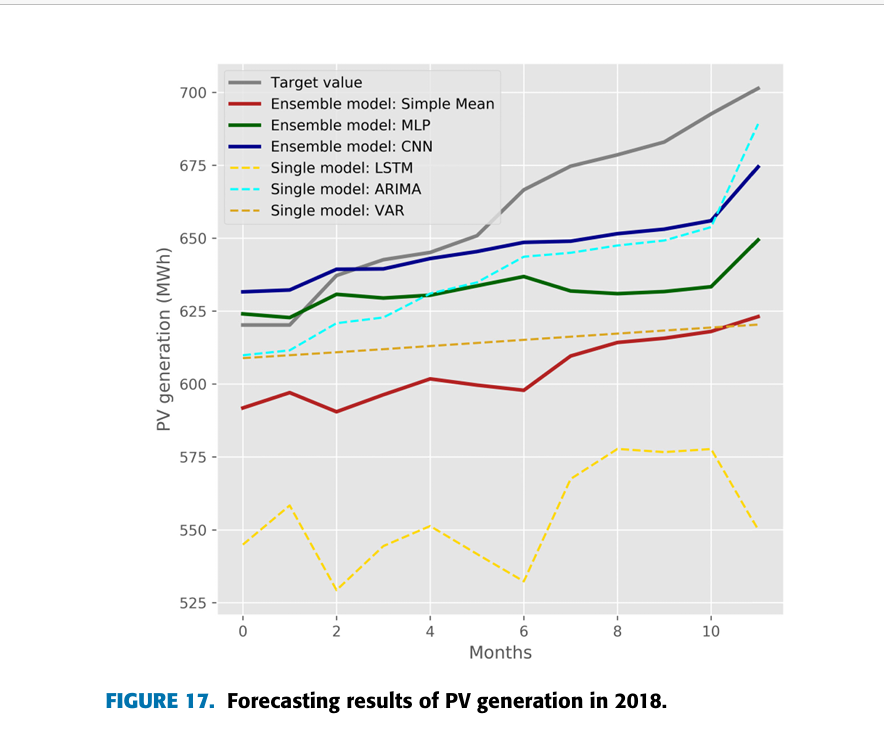